<div class="alert alert-success">

## Diabetes Treatment Safety Bot: 

### Building a model to identify high-risk patients  and predict treatment regimen for  Type 2 Diabetes 

#### Dr David Ryan 

<div>

## Contents 


**Abstract**  


1. **Introduction**  
       1.1 Diabetes blood tests  
       1.2 Problem statements  
       1.3 Proposed solution
   
   
2. **Aims**  


3. **Data Source**  
       3.1 Overview: NHANES Study   
       3.2 Data acquisition  
       3.3 Excluded participants   
       3.4 Acquired variables  
       3.5 Generated variables   
       3.6 Final variable list 
  
  
4. **Model 1**   
       4.1 Introduction    
       4.2 Random forest without balancing class   
       4.3 Random forest with class_weight modification   
       4.4 Random forest with SMOTE  
       4.5 XGBoost   
       4.6 Other ideas and what failed 
       4.7 Feature importance   
       4.8 Analysis of false negatives   
    
    
5. **Model 2**  
       5.1 Introduction 
       5.2 XGBoost to predict insulin requirement 
       5.3 Feature importance 
       5.4 XGBoost to predict anti-diabetic medication 
       5.5 Feature importance 
       5.6 Multi-label classification 
       5.7 Multi-class classification 
       5.8 Other ideas and what failed 
       
       
6. **Discussion**
       6.1 Limitations 
       6.2
       6.3 Future work 


7. **Conclusions**
    

_____

## 1. Introduction

Diabetes Mellitus is one of the most prevalent diseases in our society, affecting over 4 million people in the UK. 
Furthermore, approximately 1 in 3 people in the UK have borderline diabetes, with many not even knowing they are at risk of developing this serious medical condition.

Diabetes is a disorder that affects the body's ability to control blood sugar and as a result, leads to either excessively high levels of blood sugar (hyperglycaemia) or low blood sugar (hypoglycaemia). Complications of diabetes are extensive - ranging from increased risk of cardiovascular disease, blindness (diabetic retinopathy), chronic kidney disease to issues with nerves (neuropathy) and feet (diabetic foot disease) among other complications. As a result, diabetes is a major cause of mortality and morbidity for patients as well as representing a massive economic cost for healthcare providers. 

Risk factors for diabetes include poor diet, obesity, lack of exercise as well as age, family history and ethnicity. Therefore, it is no surprise that rates of diabetes are increasing in line with our increasingly sedentary lifestyles and aging population.  

Diabetes is typically treated using a mixture of: 
- Dietary therapy and education 
- Anti-diabetic oral medication (including metformin, sulphylureas and GLP agonists) 
- Injectable insulin therapy

 

### 1.1 Diabetes Blood Tests 

Diabetes is commonly diagnosed using laboratory blood tests. These include: 


|Test |Description |Threshold |
| --- | --- | --- |
|Oral glucose tolerance test |Consume a standardised amount of sugar and measure the change in blood sugar levels| Two hour plasma glucose concentration ≥ 11.1 mmol/l two hours after 75g anhydrous glucose.
|Random blood glucose |--- |Random blood sugar > 11.1 mmol/L | 
|HbA1c |Represents an average sugar levels over past 2 - 3 months |value > 48mmol/mol suggest diabetes| . 

**Table:** Diagnostic tests for diabates
  

Symptomatic individuals require at least one of the above diagnostic tests to make a diagnosis of diabetes. 
Asymptomatic individuals require two diagnostic tests on separate occasions to diagnose diabetes. 
There are also criteria for pre-diabetes. 

### 1.2 Problem Statements

- There are a growing number of patients attending healthcare settings with metabolic diseases (e.g. diabetes) or with risk factors for these conditions. This is placing a large burden on healthcare services.  


- Many patients with diabetes attend for problems unrelated to their diagnosis of diabetes. As such, each interaction with a healthcare professional represents an opportunity for brief interventions where new diagnosis can be made or diabetes management can be optimised. This can be challening given the stress on health systems at present with shorter consultation times and growing waiting lists. 


- Adherence to treatment for diabetes can be low - with reports that adherence to medication can be as low as 36% and that adherence to insulin regiemes can be 60%. There is a role to better identify patients who are not adherent to treatment plans to improve compliance, with subsequent improvements to outcomes.  

 

### 1.3 Proposed Solution 

Optimising treatment for diabetes, one of the most common diseases in our society, is a major priority in healthcare. 
There would be a clear benefit if this optimisation could be assisted by automated detection of high-risk patients and identification of what patient currently requires a certain treatment regimen. 

In this project, I will attempt to use commonly available blood test results in a community setting to predict diabetes severity and current treatment regimen (insulin or anti-diabetic oral agenet). This would represent a prototype for a diabetes treatment bot that could run under-the-hood of an electronic health record - using blood test results as a treatment checker - verifying whether a patient is on the correct treatment. This could serve two functions: 

- Identify people who may not be complying with treatments by highlighting when a patient may not be taking medication that may be optimal in their circumstances.

- As a fail-safe device, to promote safe and rationale prescribing - identifying when patients may not be on the most optimal treatment that a similar group of their peers would also be expected to be on.  


In this way, the system would provide a background safety net within an electronic health record to ensure that diabetes is appropriately managed.





_________________________________________________________________________________________________________________

## 2. Aims 

<div class="alert alert-info">

1. **Develop a model to identify patients with poorly controlled diabetes (as defined by a HbA1c blood test > 48mmol/L)**


2. **Develop a model that classifies whether a patient would require dietary, oral medication or injectable insulin therapy**  


3. **Consider how these models could be employed in the background of an electronic health record to create a diabetes treatment safety bot**
</div>



________

## 3. Data Source: 
#### 3.1 Overview:  NHANES Database
The National Health and Nutrition Examination Study (NHANES) is an annual cross-sectional study conducted by the American Centre for Disease Control and Prevention (CDC). This study examines the health and nutrition of a nationally representative sample of 5000 non-institutionalised, civilian people living across the US. This dataset is publically available for researchers to mine and to-date thousands of studies have been based on the data produced by NHANES. 


The NHANES study has four distinct components: 
- Questionnaire regarding demographics and health status across different domains 
- Dietary (both qualitative with food diaries and quantitative with micronutrient/macronutrient quantification)
- Clinical examination (medical, dental and physiological measurements) 
- Laboratory tests 

NHANES acts as an instantaneous snapshot of people's health and allows us to draw relationships between different health metrics on a single encounter. Online there are approximately records available to download for 90,000 patients spanning from 1999 - 2016. **This data is publically accessible and thousands of studies have been done on the database to date. I did not hack any US government website!**

#### 3.2 Data Acquisition 
Health interviews are conducted in respondents’ homes with health measurements collected by a team of healthcare professionals in specially designed and equipped mobile centers, which travel to locations throughout the US. The study team consists of a physician, a dentist, medical and health technicians, and dietary and health interviewers. Many of the study staff are bilingual (English/Spanish). 

There are inconsistencies in what data is collected between NHANE studies - variables that are collected in one year are not always necessarily collected in other years. To account for this, I am focusing my study on laboratory data as this is the most reliable and consistent data across NHANES study. This is also the least likely to be affected by cultural and regional effects, less susceptible to changes in clinical care or treatments that occuring between 1999 - 2015 and is the most similar data that would be relevant to the practice of clinical medicine in other developed countries such as the UK. 

Data was downloaded for each NHANES study from the CDC website. This data was in the form of .XPT SAS transport files and these were converted to .csv files using the SAS Universal Viewer Programme. 

#### 3.3 Exclusion Factors 

The following participants were excluded from analysis: 
- Participants < 20 years old (reduce the risk of people with Type 1 diabetes being included in the dataset) 
- Pregnant women (reduce the risk of gestational diabetes being included in the dataset) 
- Participants who were informed that they had diabetes before the age of 20 years.  

This leaves 43,150 patients in my final dataset. 









#### 3.4 Acquired Variables 

The following data was collected from each NHANES study: 

<div class="alert alert-info">
    
 **Demographics:**   
 'Gender'  
 'Age'  
 'Other_Ethnicity'  
 'Annual_household_income'  
 'Annual_family_income'  
 
 **Diabetes Status:** 
 
 'Known_T2DM'  
   
 **Laboratory Variables:**
 
 'trig_mmol/l'  
 'ldl_mmol/l'  
 'hdl_mmol/l'  
 'tchol_mmol/l'  
 'Creatinine, refrigerated serum (mg/dL)'
 'Hbg/dL'
 'HbA1c_correct'
 'Albumin, refrigerated serum (g/dL)'  
 'Alanine Aminotransferase (ALT) (U/L)'  
 'Alkaline Phosphatase (ALP) (U/L)'  
 'Aspartate Aminotransferase (AST) (U/L)'  
 'Bicarbonate (mmol/L)'  
 'Blood Urea Nitrogen (g/dL)'  
 'Chloride (mmol/L)'  
 'Cholesterol, refrigerated serum (mg/dL)'  
 'Creatine Phosphokinase (CPK) (IU/L)'  
 'Creatinine, refrigerated serum (mg/dL)'  
 'Gamma Glutamyl Transferase (GGT) (U/L)'  
 'Glucose, refrigerated serum (mg/dL)'  
 'Iron, refrigerated serum (ug/dL)'  
 'Lactate Dehydrogenase (LDH) (U/L)'  
 'Phosphorus (mg/dL)'  
 'Potassium (mmol/L)'  
 'Sodium (mmol/L)'  
 'Total Bilirubin (mg/dL)'  
 'Total Calcium (mg/dL)'  
 'Total Protein (g/dL)'  
 'Triglycerides, refrig serum (mg/dL)'  
 'Uric Acid (mg/dL)'
 
 **Anthropometric measurements:**  
 'weightkg'  
 'bmi'  
 'waistcircum'  
 'avgsagittalabdodiameter'  
 
 **Other Clinical Measurements:**  
 'systolic_1'  
 'diastolic_1'
 'systolic_2'  
 'diastolic_2' 
 'systolic_3'  
 'diastolic_3' 
 
 **Prescribed medication**  
 Full drug prescriptions for each participant was accessed 
   
</div>

In [1351]:
#Import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

import shap

In [1352]:
#Load the dataframe
df = pd.read_csv('nhanes_170220.csv')

In [1353]:
#remove redundant columns 
df.drop(columns=['SEQN','Unnamed: 0', 'trig_mmol/l'], axis=1, inplace=True)

In [1354]:
#list of acquired variables 
list(df.columns)

['Gender',
 'Age',
 'Other_Ethnicity',
 'Annual_household_income',
 'Annual_family_income',
 'Known_T2DM',
 'ldl_mmol/l',
 'hdl_mmol/l',
 'tchol_mmol/l',
 'Creatinine, refrigerated serum (mg/dL)',
 'Hbg/dL',
 'HbA1c_correct',
 'Albumin, refrigerated serum (g/dL)',
 'Alanine Aminotransferase (ALT) (U/L)',
 'Alkaline Phosphatase (ALP) (U/L)',
 'Aspartate Aminotransferase (AST) (U/L)',
 'Bicarbonate (mmol/L)',
 'Blood Urea Nitrogen (g/dL)',
 'Chloride (mmol/L)',
 'Cholesterol, refrigerated serum (mg/dL)',
 'Creatine Phosphokinase (CPK) (IU/L)',
 'Creatinine, refrigerated serum (mg/dL).1',
 'Gamma Glutamyl Transferase (GGT) (U/L)',
 'Glucose, refrigerated serum (mg/dL)',
 'Iron, refrigerated serum (ug/dL)',
 'Lactate Dehydrogenase (LDH) (U/L)',
 'Phosphorus (mg/dL)',
 'Potassium (mmol/L)',
 'Sodium (mmol/L)',
 'Total Bilirubin (mg/dL)',
 'Total Calcium (mg/dL)',
 'Total Protein (g/dL)',
 'Triglycerides, refrig serum (mg/dL)',
 'Uric Acid (mg/dL)',
 'weightkg',
 'bmi',
 'waistcircum',
 'avgsagittalabdodiameter',
 'avg_systolic',
 'avg_diastolic',
 'Prescriptions']

In [1355]:
df.shape

(43150, 41)

There are 43,150 participants in this dataset


#### 3.5 Generated Variables 

Some variables had to be adjusted and cleaned. For example: 
- HbA1c is only valid in the absence of anaemia or other issue with haemoglobin - therefore, HbA1c was np.nan if participant was anaemic. This adjustment was recoded as HbA1c_correct
- HbA1c > 48 was defined in a category as being sub-optimal diabetic control and representing poorly controlled diabetes. If HbA1c was missing - HbA1c_48 was also missing. 
- HbA1c > 42 was also employed as a separate category.
- Insulin and medications were determined based on the prescription chart associated with each participant. 
- eGFR (renal function) was calculated according to Cockroft and Gault equation - using creatinine, age, gender and ethnicity. 
- metabolic risk is a composite to identify participants who either have known T2DM or HbA1c >= 42 or high random glucose > 11.1mmol/L. These would be consistent with needing further clinical work-up for a diagnosis of diabetes or pre-diabetes.

In [1356]:
#High HbA1c category (split at 48mmol/L)

def hba1c_split_48(row): 
    """
    This splits HbA1c into categories according to whether it is above or below threshold of 48 mmol/L
    
    """
    if np.isnan(row['HbA1c_correct']):
        return(np.nan)
    elif row['HbA1c_correct'] >= 48:
        return(1)
    else: 
        return(0)

df['hba1c_48'] = df.apply(hba1c_split_48, axis=1)




In [1357]:
#High HbA1c category (split at 42mmol/L)

def hba1c_split_42(row): 
    """
    This splits HbA1c into categories according to whether it is above or below threshold of 42 mmol/L
    
    """
    if np.isnan(row['HbA1c_correct']):
        return(np.nan)
    elif row['HbA1c_correct'] >= 42:
        return(1)
    else: 
        return(0)

df['hba1c_42'] = df.apply(hba1c_split_42, axis=1)



In [1358]:
#Insulin prescribed 
df['insulin_prescribed'] = np.where(df['Prescriptions'].str.contains('INSULIN', na=False), 1, 0)


I also created a column depending on whether a participant was prescribed a common form of oral anti-diabetic agent (metformin, SU, GLP agonist) 

In [1359]:
#diabetic medication prescribed 
df['diabetic_medication'] = np.where(df['Prescriptions'].str.contains('LIRAGLUTIDE|METFORMIN|GLICLAZIDE|GILCLAZIDE|GLIPIZIDE|TOLBUTAMIDE|GILBENCLAMIDE', na=False), 1, 0)

Renal function is commonly defined using the Cockroft and Gault Equation: 


In [1360]:
#eGFR calculated 

def egfr_calculator(row): 
    
    """
    This calculates renal function according to the Cockroft and Gault Equation
    """
    
    if np.isnan(row['Creatinine, refrigerated serum (mg/dL)']): 
        return(np.nan)
    
    elif row['Other_Ethnicity'] == 4 and row['Gender'] == 2: 
        egfr = 186*((row['Creatinine, refrigerated serum (mg/dL)'])**(-1.154))*((row['Age'])**-0.203)*(0.742*1.212)
        return(egfr)
        
    elif row['Other_Ethnicity'] == 4: 
        egfr = 186*((row['Creatinine, refrigerated serum (mg/dL)'])**(-1.154))*((row['Age'])**-0.203)*(1.212)
        return(egfr)
          
        
    elif row['Gender'] == 2: 
        egfr = 186*((row['Creatinine, refrigerated serum (mg/dL)'])**(-1.154))*((row['Age'])**-0.203)*(0.742)
        return(egfr)
           
    else: 
        egfr = 186*((row['Creatinine, refrigerated serum (mg/dL)'])**(-1.154))*((row['Age'])**-0.203)
        return(egfr) 
           
          
df['eGFR']= df.apply(egfr_calculator, axis=1) 



In [1361]:
#metabolic risk 

def metabolic_risk(row): 
    
    if (row['Known_T2DM'] == 1) or (row['hba1c_42']==1) or (row['Glucose, refrigerated serum (mg/dL)']==1): 
        return(1)
    else: 
        return(0)
    
df['metabolic_risk']=df.apply(metabolic_risk, axis=1)

## Clean Some Laboratory Results 

Some labs have many values as 0 (which are likely missing). These need to be replaced. 

Analysis of missing values suggests I need to replace 0 to np.nan in: 
- Triglycerides, refrig serum (mg/dL)             0
- Uric Acid (mg/dL)                               0
- weightkg                                        0

In [1364]:
df.isnull().sum()

Gender                                          0
Age                                             0
Other_Ethnicity                                 0
Annual_household_income                      2677
Annual_family_income                         1891
Known_T2DM                                      0
ldl_mmol/l                                  24253
hdl_mmol/l                                   2503
tchol_mmol/l                                 2502
Creatinine, refrigerated serum (mg/dL)       2608
Hbg/dL                                       2027
HbA1c_correct                                8155
Albumin, refrigerated serum (g/dL)           2606
Alanine Aminotransferase (ALT) (U/L)         2686
Alkaline Phosphatase (ALP) (U/L)             6018
Aspartate Aminotransferase (AST) (U/L)       2691
Bicarbonate (mmol/L)                         2676
Blood Urea Nitrogen (g/dL)                   2610
Chloride (mmol/L)                            2612
Cholesterol, refrigerated serum (mg/dL)      2614


In [1368]:
#clean some laboratory values 
df['Triglycerides, refrig serum (mg/dL)'].replace({0:np.nan}, inplace=True)
df['Uric Acid (mg/dL)'].replace({0:np.nan}, inplace=True)
df['weightkg'].replace({0:np.nan}, inplace=True)

In [1370]:
#save file 
df.to_csv('final_data.csv')

## Exploratory Data Analysis 

In [1371]:
#save dataframe
df = pd.read_csv('final_data.csv')

## 4.1 Demographics 

There are 43,150 patients in the study cohort.
  


**Table:** Descriptive Statistics 

|Demographics <img width=100/>|<img width=200/> |Number of participants<img width=200/>|
|:--|:-----|:------------------------------|
|Gender |Male <br><br> Female | 21,373 <br><br> 21,777 | 
|Ethnicity | Non-Hispanic White <br><br> Non-Hispanic Black <br><br> Mexican-American <br><br> Other Hispanic <br><br> Non-Hispanic Asian <br><br> Other Race including multi-racial <br><br> | 19, 533 <br><br> 8,975 <br><br> 7,554 <br><br> 3,542 <br><br> 1,950 <br><br> 1,596 |
|Age <br> (years) | Average: 50 <br><br> 20 - 40 years <br><br>40-60 years <br><br> 60+ years|  <br><br> 13,857 <br><br> 14,395 <br><br> 14,898 |
|BMI <br>(kg/m^2) | Average: 27.8 <br><br> Underweight (<18.5) <br><br> Normal weight (18.5 - 25) <br><br> Overweight (25 - 30) <br><br>obese (>35)|  <br><br> 708 <br><Br> 12266 <br><Br> 14664<br><Br> 15335 |
|Annual Household Income |Under 20,000 USD <br><br> 20,000 - 75,000 USD <br><br> 75,000 - 100,000 USD <br><br> Over 100,000 USD <br><br>Missing|9,223<br><br> 21,715 <br><br> 5,430 <br><br>4,105 <br><br> 2,677 |
    
   
 Table suggests that demographics are largely similar to what would be expected for a population of adults in the US.
 _____________________





In [1373]:
#Cut bins to explore data in categories 


age_bins = [20, 40, 60, 100]
df['age_binned'] = pd.cut(df['Age'], age_bins)
df['age_binned'].value_counts()

(20, 40]     14696
(40, 60]     14483
(60, 100]    13971
Name: age_binned, dtype: int64

In [1374]:
#Cut BMI to explore data in categories 

bmi_bins = [0, 18.5, 25, 30, 100]
df['bmi_binned'] = pd.cut(df['bmi'], bmi_bins)
df['bmi_binned'].value_counts()

(30.0, 100.0]    15335
(25.0, 30.0]     14664
(18.5, 25.0]     12266
(0.0, 18.5]        708
Name: bmi_binned, dtype: int64

## 4.2 Description of Cohort with likely Diabetes  


8,159 (18.9%) have either known type 2 diabetes, pre-diabetes, or have criteria suggestive of a possible diagnosis of diabetes - random blood glucose > 11.1 or HbA1c > 48.  



**Table:** Participants with likely diabetes have worse health status compared to participants who are not likley to have diabetes



In [1375]:
df.groupby(by='metabolic_risk')['Age', 'bmi', 'HbA1c_correct', 'avg_systolic'].mean()

Age        bmi  HbA1c_correct  avg_systolic
metabolic_risk                                                   
0               48.795747  28.290841      34.837104    124.167154
1               57.223312  31.331828      51.226092    129.682465

**Table:** Treatment Summary

|Treatment|Number of participants in full dataset on treatment| Number of participants with Diabetes/pre-diabetes on treatments  |
|:--|:------------------------------|:----|
|No treatment |39,360 (91.21%)| 5,840 (71.58%) |
|Oral anti-diabetic agent monotherapy|2,659 (6.16%)| 1,614 (19.78%)|
|Insulin monotherapy | 676 (1.57%)|391 (4.79%)|
|Oral agent and insulin | 455 (1.05%) |314 (3.84%)|
|Total population | 43,150 | 8, 159|


To find the actual treatment a patient is receiving, I need a function to generate another column - note a patient can be receiving both insulin and oral medication.  

Therefore 4 possible treatment options: 
- No treatment 
- Oral agents only 
- Injectable insulin only 
- both oral and injectable insulin

In [1376]:
#function to create a new column with actual treatment regieme 
def actual_treatment(row): 
    """
    creates a new column with actual treatment - to account for overlap in treatment modalities 
    """
    if ((row['insulin_prescribed'] == 0) & (row['diabetic_medication'] == 0)): 
        return(0)
    elif ((row['insulin_prescribed'] == 0) & (row['diabetic_medication'] == 1)): 
        return(1)
    elif ((row['insulin_prescribed'] == 1) & (row['diabetic_medication'] == 0)): 
        return(2)
    elif ((row['insulin_prescribed'] == 1) & (row['diabetic_medication'] == 1)): 
        return(3)

df['actual_treatment'] = df.apply(actual_treatment, axis=1)

[14:15:16] ======== Monitor: Learner ========
[14:15:16] ======== Monitor: GBTree ========


In [1377]:
df.groupby(by='metabolic_risk')['actual_treatment'].value_counts()

metabolic_risk  actual_treatment
0               0                   33520
                1                    1045
                2                     285
                3                     141
1               0                    5840
                1                    1614
                2                     391
                3                     314
Name: actual_treatment, dtype: int64

This is broadly what I expected in the metabolic_risk category. 

Interestingly, there are 1045 participants who do not have known diabetes or have likely diabetes on anti-diabetic medication. 
This may be due to metformin being used in alternative medical conditions (e.g. PCOS)

However, people prescribed insulin may have not responded to the T2DM question in the NHANES survey and could have good control over diabetes. This could explain the 285 people who are in the low metabolic_risk category who are prescribed insulin and the 141 people who are prescribed both insulin and tablet treatments. 


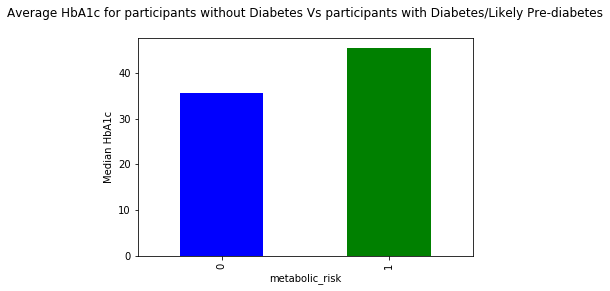

In [1378]:
#compute the average HbA1c for both participants with diabetes and without 
df.groupby('metabolic_risk')['HbA1c_correct'].median().plot(kind='bar', color=['blue', 'green'])
plt.title("Average HbA1c for participants without Diabetes Vs participants with Diabetes/Likely Pre-diabetes\n")
plt.ylabel('Median HbA1c');


In [1380]:
#missing values for HbA1c 
df['hba1c_48'].value_counts(dropna=False)

0.0    32031
NaN     8155
1.0     2964
Name: hba1c_48, dtype: int64

In [1379]:
#How many people in the likely diabetic category have poor control (defined as HbA1c > 48)

df.groupby('metabolic_risk')['hba1c_48'].value_counts()

metabolic_risk  hba1c_48
0               0.0         27320
1               0.0          4711
                1.0          2964
Name: hba1c_48, dtype: int64

2964 have poor control as defined by hba1c>48. 

Of the patients who we have HbA1c results for, this represents 8.5%. 

In [1381]:
#what treatment are participants who have poor control likely to be on? 

diabetics_m = df['metabolic_risk'] == 1
diabetics = df[diabetics_m].copy()

not_diabetics_m = df['metabolic_risk'] == 0 
not_diabetics = df[not_diabetics_m]

In [1382]:
pd.DataFrame(diabetics.groupby('hba1c_48')['actual_treatment'].value_counts(normalize=True))

actual_treatment
hba1c_48 actual_treatment                  
0.0      0                         0.892804
         1                         0.093398
         2                         0.009340
         3                         0.004458
1.0      0                         0.411606
         1                         0.380229
         2                         0.110999
         3                         0.097166

- Twice the proportion of people are not treated if their HbA1c < 48 compared to people with HbA1c > 48   
- There is much more intensive treatment in patients who have HbA1c > 48 

_______

## Laboratory Results: Exploration of Correlation


Features clustered according to major biochemical group or organ-system. Correlation with HbA1c and glucose explored through scatterplots and heatmaps. 

invalid value encountered in greater_equal
invalid value encountered in less_equal


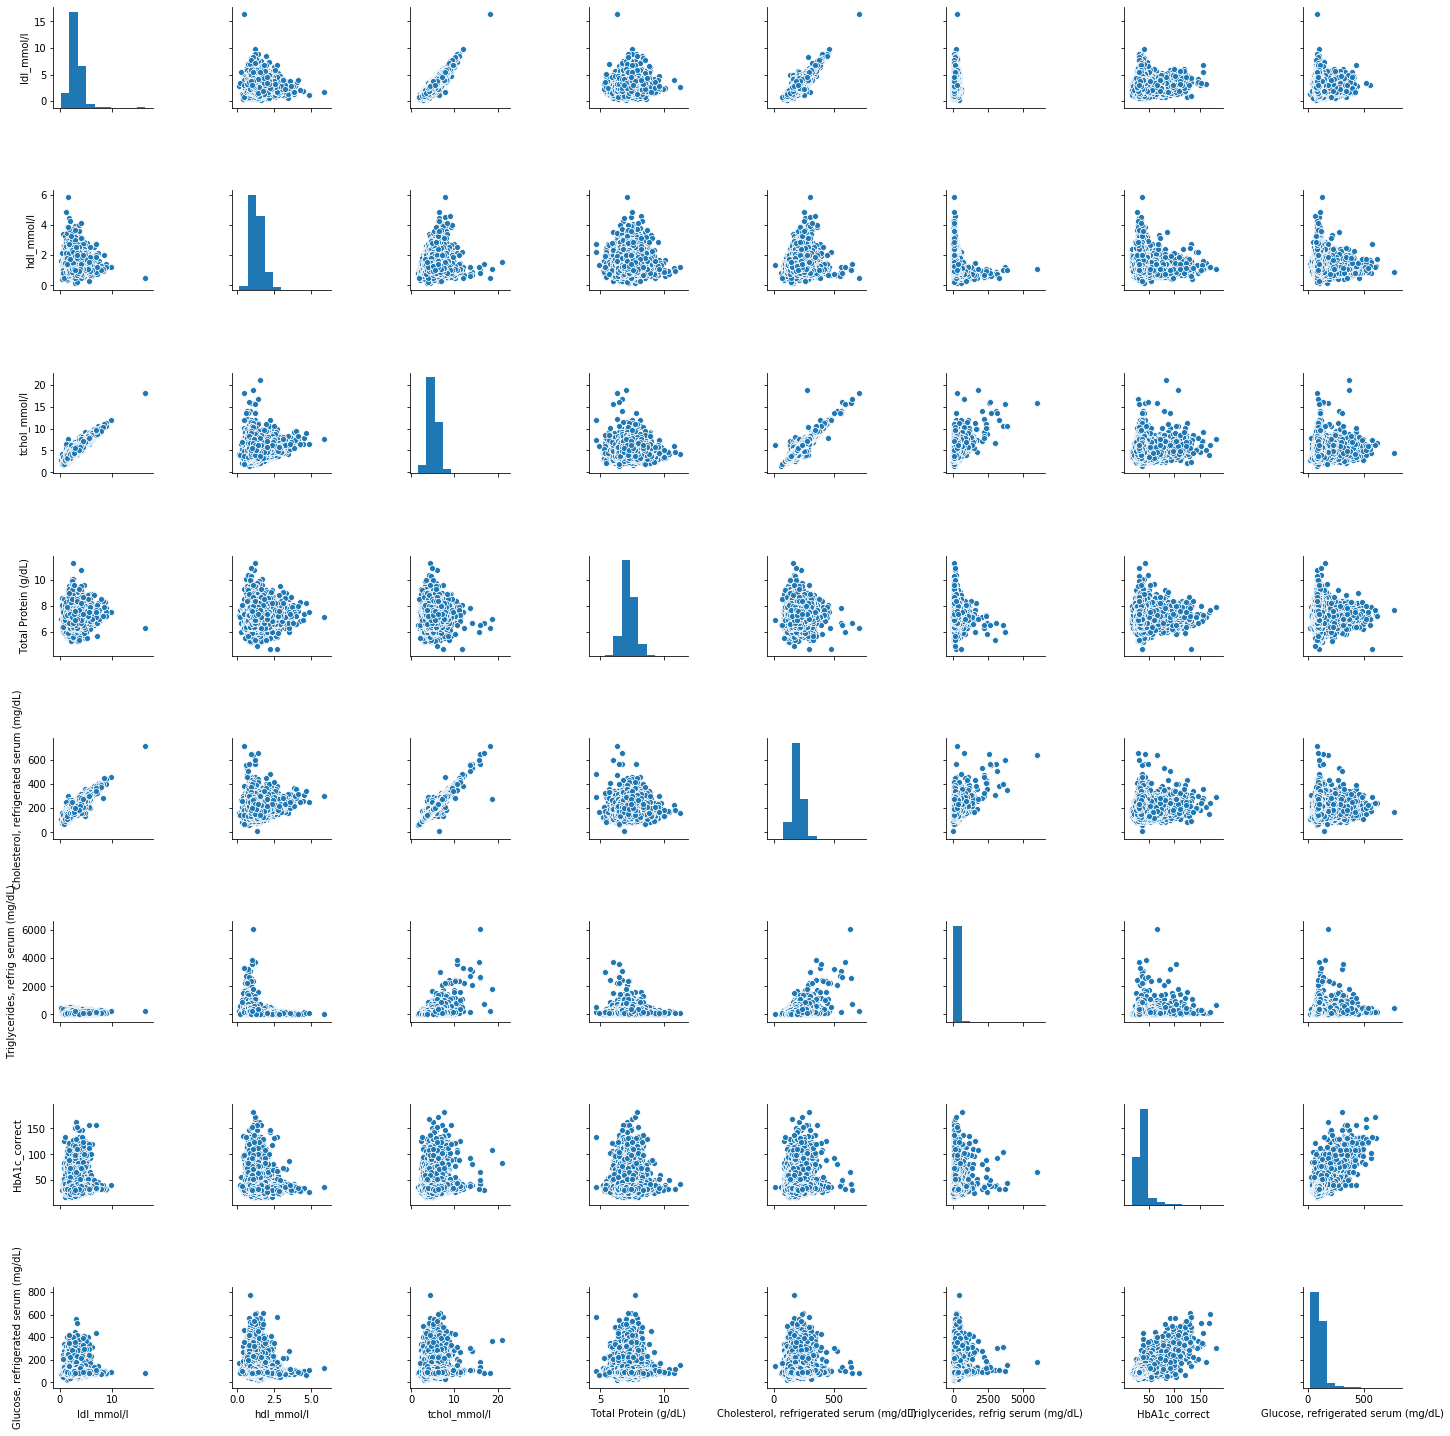

In [1383]:
#lipids 
 
lipids = ['ldl_mmol/l','hdl_mmol/l','tchol_mmol/l','Total Protein (g/dL)','Cholesterol, refrigerated serum (mg/dL)',
'Triglycerides, refrig serum (mg/dL)', 'HbA1c_correct', 'Glucose, refrigerated serum (mg/dL)']

sns.pairplot(df, vars=lipids, kind='scatter')



In [218]:
#maximum values for lipids 
pd.DataFrame(df[['hdl_mmol/l', 'Cholesterol, refrigerated serum (mg/dL)','ldl_mmol/l']].max(), columns=['max'])

max
hdl_mmol/l                                 5.840
Cholesterol, refrigerated serum (mg/dL)  712.000
ldl_mmol/l                                16.266

This figure conveys that there is a lot of correlation between different classes of lipids with little linear relationships evident between glucose metrics and lipids. 

However, I note extreme values and question whether such extreme values (while being biologically plausible) may indeed be distorting scales of graphs, thus obscuring our view of relationships between variables. 

I will now remove values below the 1st percentile and above the 99th percentile to systematically remove extreme values and investigate whether this provides a better overview of relationships. 

## Investigate whether removing extreme values alters the graphical relationships between variables 

This will be trialled for relationship between cholesterol, refrigerated serum (mg/dL) and glucose 

In [228]:
df['Cholesterol, refrigerated serum (mg/dL)'].describe()

count    40536.000000
mean       196.265122
std         42.133622
min          6.000000
25%        167.000000
50%        193.000000
75%        221.000000
max        712.000000
Name: Cholesterol, refrigerated serum (mg/dL), dtype: float64

Max cholesterol value was 712 - this is still biologically plausible (e.g. nephrotic syndome) - but I want to investigate whether removing such extreme values would improve our visualisation of relationships. 


In [385]:
#divide into percentiles - cholesterol 
pd.qcut(df['Cholesterol, refrigerated serum (mg/dL)'], q=100).value_counts().sort_index()

(5.999, 113.0]    440
(113.0, 121.0]    405
(121.0, 126.0]    389
(126.0, 130.0]    399
(130.0, 134.0]    465
                 ... 
(269.0, 275.0]    443
(275.0, 282.0]    385
(282.0, 292.0]    375
(292.0, 309.0]    403
(309.0, 712.0]    404
Name: Cholesterol, refrigerated serum (mg/dL), Length: 100, dtype: int64

This shows us that the bottom 1st percentile occurs with values between 5.99 - 113.0 and the top decile occurs for values above 309.0. I will now remove these using boolean masking. 

In [255]:
cholesterol_m = ((df['Cholesterol, refrigerated serum (mg/dL)'] > 113.0) & (df['Cholesterol, refrigerated serum (mg/dL)']<309.0))
cholesterol_no_extreme = df[cholesterol_m].copy()

Now do the same process for glucose...

In [256]:
df['Glucose, refrigerated serum (mg/dL)'].describe()

count    40544.000000
mean       101.712633
std         37.666450
min         19.000000
25%         85.000000
50%         92.000000
75%        103.000000
max        617.000000
Name: Glucose, refrigerated serum (mg/dL), dtype: float64

In [257]:
#divide into percentiles - glucose 
pd.qcut(df['Glucose, refrigerated serum (mg/dL)'], q=100, duplicates='drop').value_counts().sort_index()

(18.999, 65.0]      411
(65.0, 70.0]        450
(70.0, 73.0]        544
(73.0, 74.0]        267
(74.0, 76.0]        731
(76.0, 77.0]        446
(77.0, 78.0]        579
(78.0, 79.0]        710
(79.0, 80.0]        801
(80.0, 81.0]        917
(81.0, 82.0]        990
(82.0, 83.0]       1128
(83.0, 84.0]       1204
(84.0, 85.0]       1277
(85.0, 86.0]       1316
(86.0, 87.0]       1440
(87.0, 88.0]       1426
(88.0, 89.0]       1453
(89.0, 90.0]       1454
(90.0, 91.0]       1407
(91.0, 92.0]       1422
(92.0, 93.0]       1286
(93.0, 94.0]       1227
(94.0, 95.0]       1163
(95.0, 96.0]       1009
(96.0, 97.0]        964
(97.0, 98.0]        926
(98.0, 99.0]        829
(99.0, 100.0]       838
(100.0, 101.0]      704
(101.0, 102.0]      643
(102.0, 103.0]      597
(103.0, 104.0]      574
(104.0, 105.0]      518
(105.0, 106.0]      424
(106.0, 107.0]      396
(107.0, 109.0]      696
(109.0, 110.0]      322
(110.0, 111.0]      295
(111.0, 112.12]     273
(112.12, 114.0]     466
(114.0, 116.0]  

In [258]:
glucose_m = ((df['Glucose, refrigerated serum (mg/dL)'] > 65.0) & (df['Glucose, refrigerated serum (mg/dL)']<283.0))
glucose_no_extreme = df[glucose_m]

In [259]:
glucose_no_extreme['Glucose, refrigerated serum (mg/dL)']

0         94.0
1         94.0
2        103.0
4         97.0
5         86.0
         ...  
43145     81.0
43146     82.0
43147     89.0
43148     86.0
43149     95.0
Name: Glucose, refrigerated serum (mg/dL), Length: 39726, dtype: float64

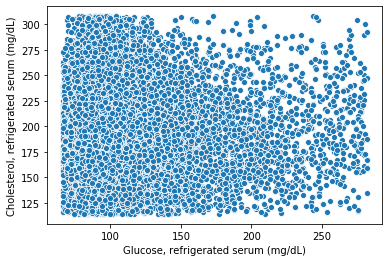

In [260]:
#scatterplot of values with extreme values removed 
sns.scatterplot(glucose_no_extreme['Glucose, refrigerated serum (mg/dL)'], cholesterol_no_extreme['Cholesterol, refrigerated serum (mg/dL)'])

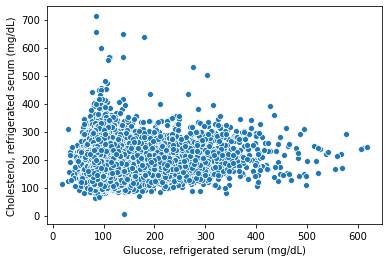

In [261]:
sns.scatterplot(df['Glucose, refrigerated serum (mg/dL)'], df['Cholesterol, refrigerated serum (mg/dL)'])

It appears that removing top and bottom percentile obscured the weak linear relationship that exists between glucose and cholesterol. 
This approach is likely not appropriate and did not improve our ability to assess the relationships between variables - potentially inferring that extreme values are inherently important to establish relationships. 

It is also possible that blanket exclusion of top and bottom percentile may not be appropriate for all variables and that different threshold for what is classified as an outlier may be unique to each feature.  

Therefore I will not be cleaning my data to account for extreme values. This approach also means that I remain truthful to actual clinical settings where extreme values will be present - healthcare data is not very clean!

invalid value encountered in greater_equal
invalid value encountered in less_equal


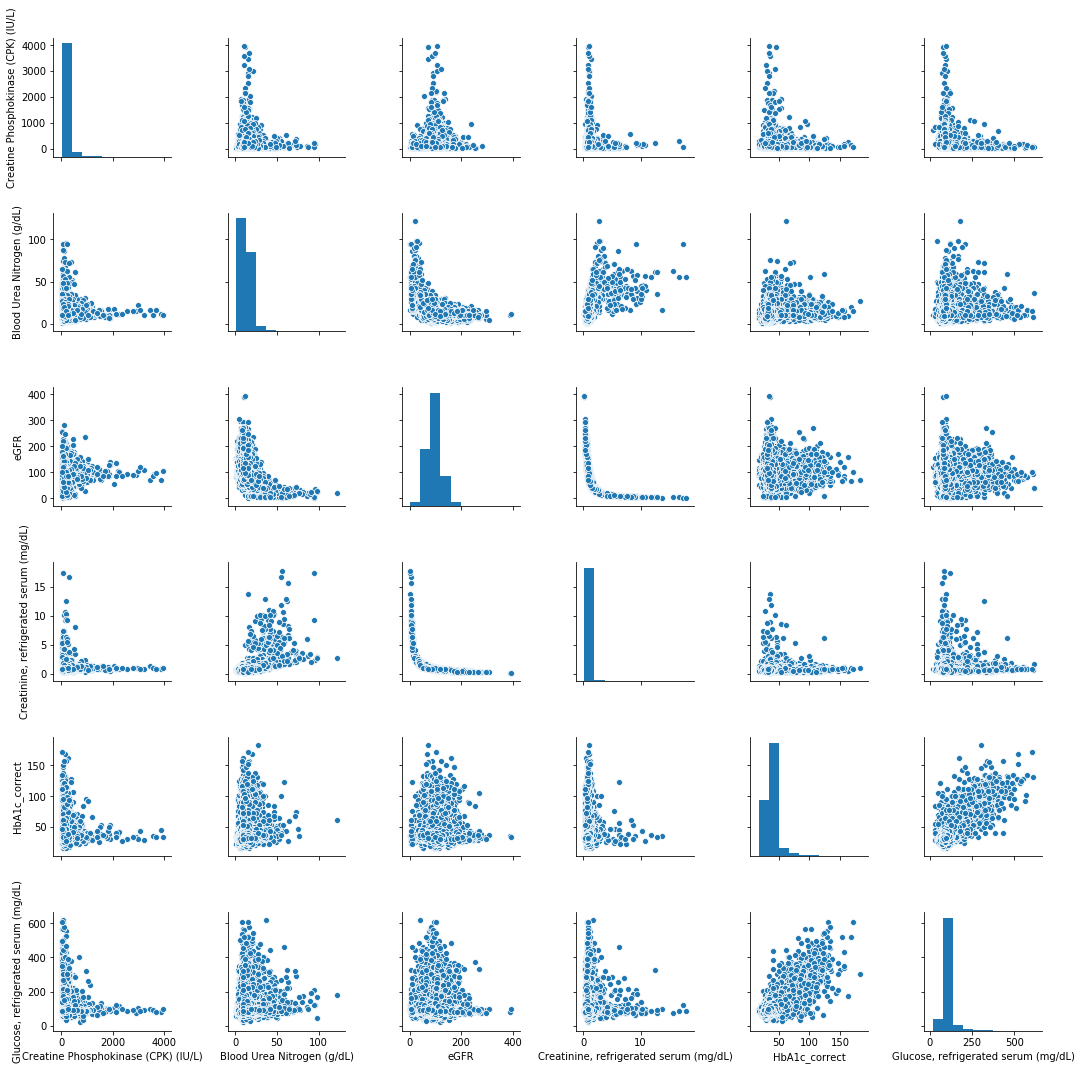

In [266]:
#kidney function 

kidney = ['Creatine Phosphokinase (CPK) (IU/L)', 'Blood Urea Nitrogen (g/dL)','eGFR', 'Creatinine, refrigerated serum (mg/dL)','HbA1c_correct', 'Glucose, refrigerated serum (mg/dL)']
sns.pairplot(df, vars=kidney, kind='scatter')


There appears to be a curvilinear relationship between many of the kidney variables. 
- As HbA1c and glucose increase, there is a decrease in the CK and Creatinine. This appears to be a curvilinear/asymptotic relationship. 
- As expected, there is a curvilinear/asymptotic relationship between creatinine and eGFR. eGFR is calculated based on creatinine levels. 

invalid value encountered in greater_equal
invalid value encountered in less_equal


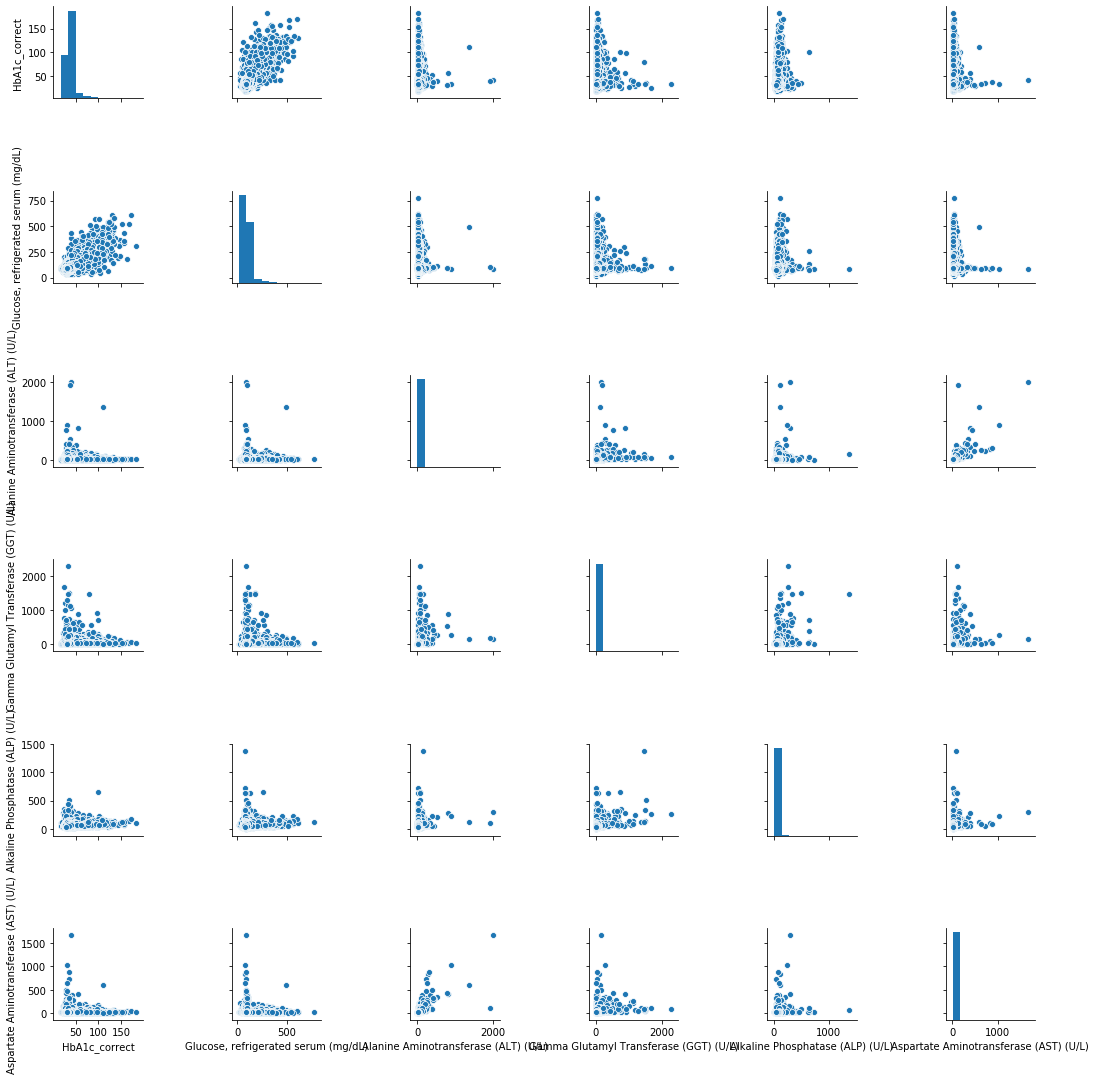

In [166]:
#liver function 
liver = ['HbA1c_correct', 'Glucose, refrigerated serum (mg/dL)','Alanine Aminotransferase (ALT) (U/L)','Gamma Glutamyl Transferase (GGT) (U/L)', 'Alkaline Phosphatase (ALP) (U/L)', 'Aspartate Aminotransferase (AST) (U/L)']
sns.pairplot(df, vars=liver, kind='scatter')


These graphs suggest little relatinonship between liver function tests and glucose/HbA1c. There is too much variability in glucose to spot any trend in relationship.  

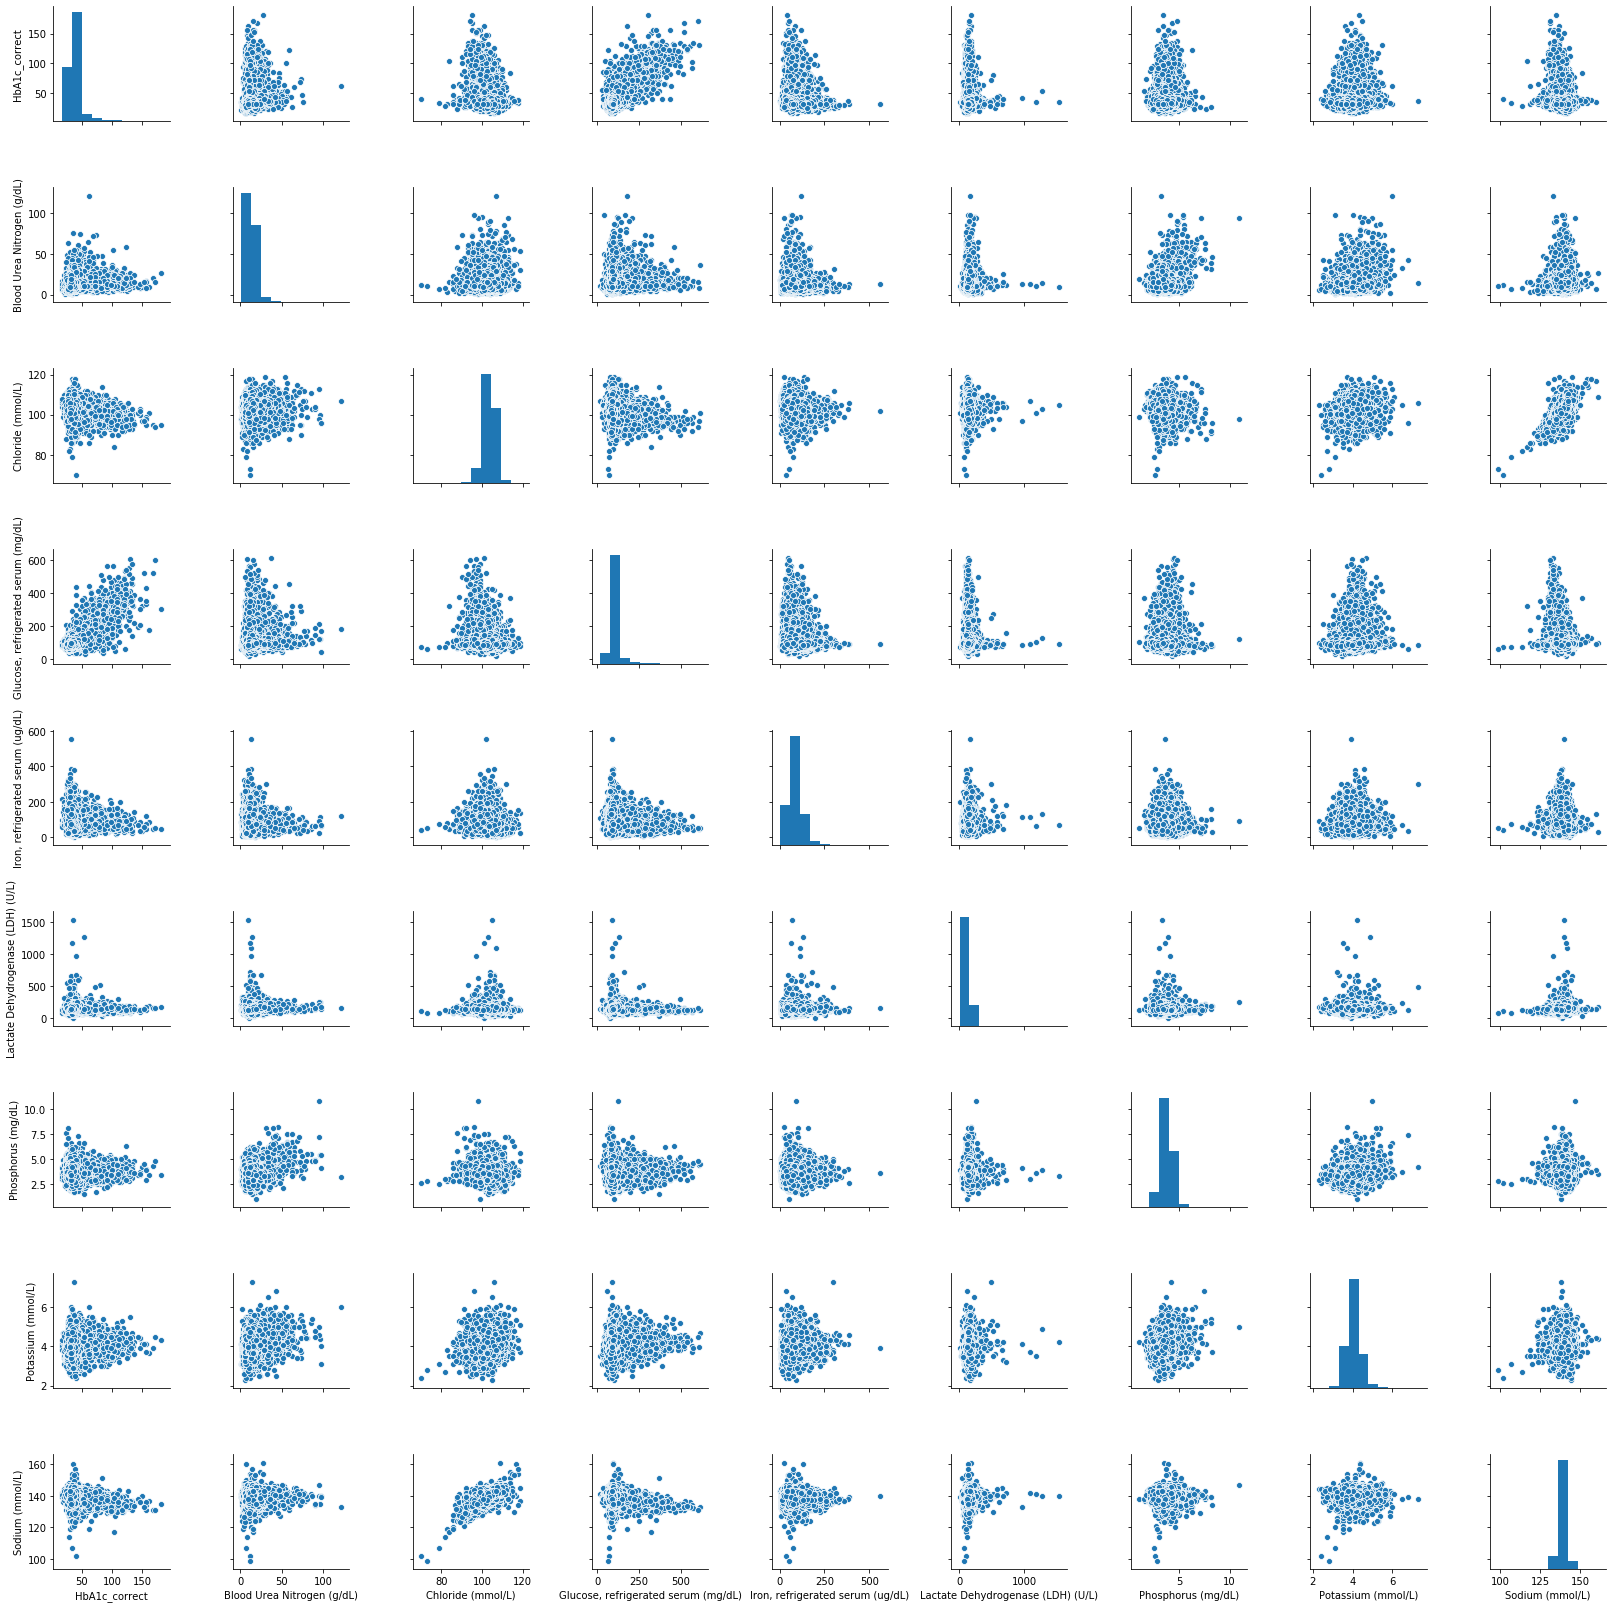

In [278]:
#other metabolic bloods and electrolytes 

others = ['HbA1c_correct', 'Blood Urea Nitrogen (g/dL)', 'Chloride (mmol/L)', 'Glucose, refrigerated serum (mg/dL)', 'Iron, refrigerated serum (ug/dL)', 'Lactate Dehydrogenase (LDH) (U/L)', 'Phosphorus (mg/dL)', 'Potassium (mmol/L)', 'Sodium (mmol/L)', ]

sns.pairplot(df, vars=others, kind='scatter')


There appears to be little relationship between electrolytes and glucose. This is suggesting that there is too much variability in blood tests to establish any firm relationship. However, there does appear to be increased frequency of high HbA1c values at extremes of electrolytes. See below example suggesting that at high (>5) and low (<3) values of potassium, there are more values of higher HbA1cs. This would make sense from a clinical perspective where people with either hypo or hyperkalaemia are more likely to have medical co-morbidities such as diabetes. 

Text(0.5, 1.0, 'Relationship between potassium and HbA1c ')

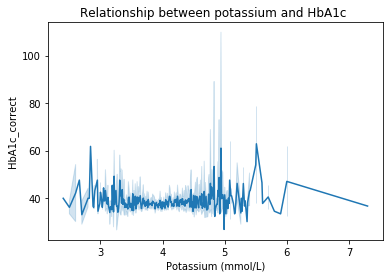

In [290]:
sns.lineplot(df['Potassium (mmol/L)'], df['HbA1c_correct'])
plt.title("Relationship between potassium and HbA1c ")

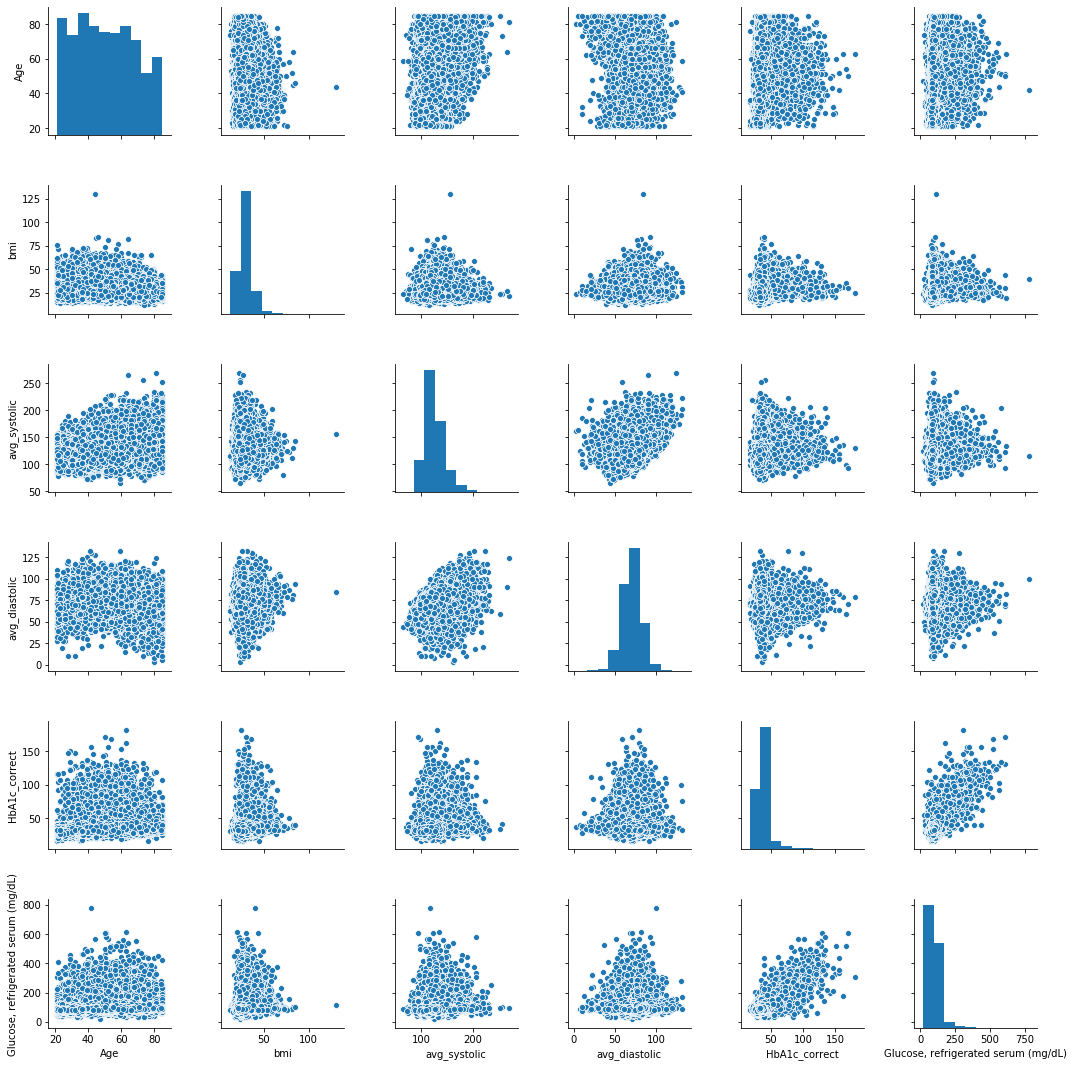

In [187]:
#measurements e.g. BP and BMI and HbA1c and glucose 

measurements = ['Age', 'bmi', 'avg_systolic', 'avg_diastolic', 'HbA1c_correct', 'Glucose, refrigerated serum (mg/dL)']
sns.pairplot(df, vars = measurements)

Again, this conveys that there is little correlation between glucose metrics and measurements. Interestingly, there appears to be a curvilinear relationship between systolic and distolic BP and glucose.
As glucose increases, initially SBP and DBP increase but that at higher levels of glucose, BP is lower.

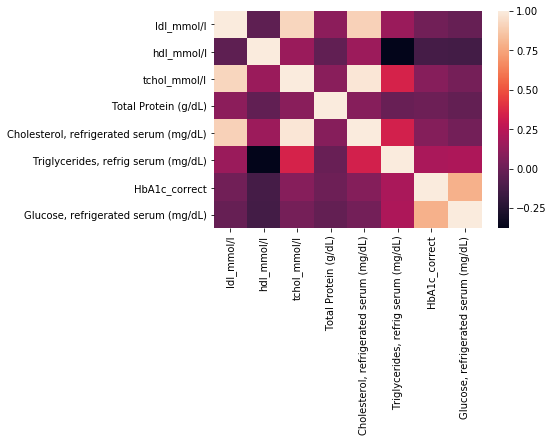

In [190]:
lipid_corr = df[lipids].corr()
sns.heatmap(lipid_corr)

Most correlated with glucose metrics: Triglycerides 

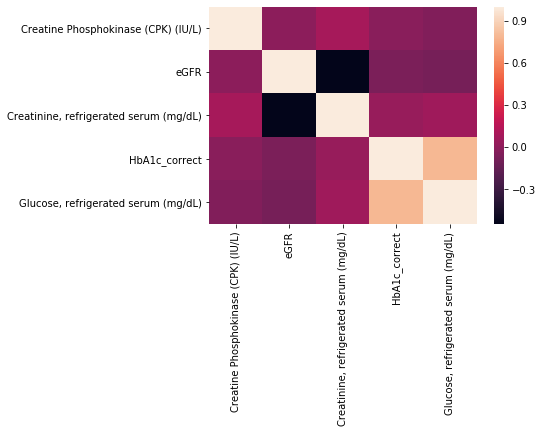

In [191]:
kidney_corr = df[kidney].corr()
sns.heatmap(kidney_corr)

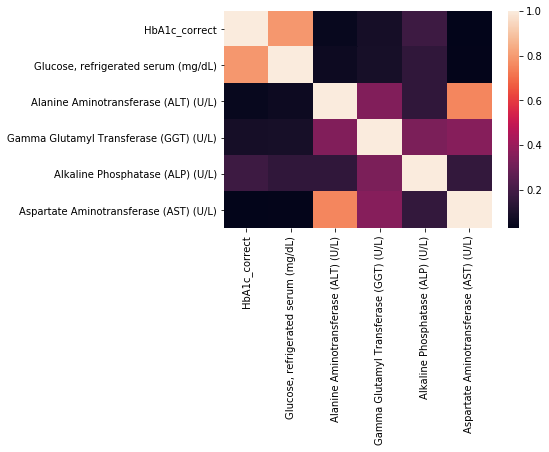

In [192]:
liver_corr = df[liver].corr()
sns.heatmap(liver_corr)

Most correlated with glucose metrics: ALP 

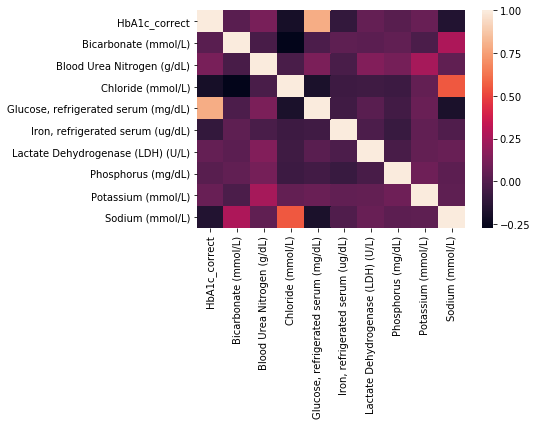

In [193]:
others_corr = df[others].corr()
sns.heatmap(others_corr)

Negative weak correlation with glucose: Sodium and chloride  

Blood Urea Nitrogen appears to be weakly positively correlated with glucose metrics. 

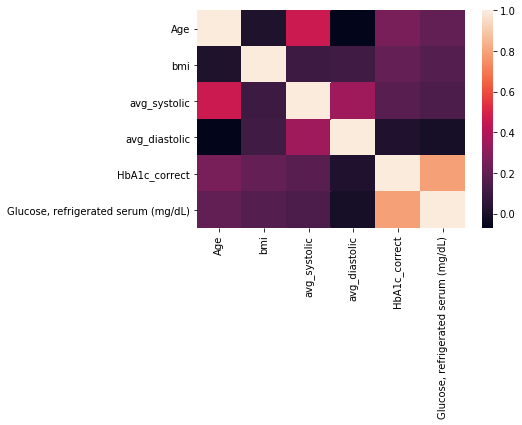

In [194]:
measurements_corr = df[measurements].corr()
sns.heatmap(measurements_corr)

These plots again show weak relationships existing between variables. 
Also, there exists many correlated variables e.g. many of the lipid variables are correlated with each other. 

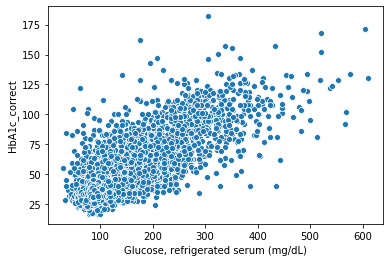

In [17]:
#relationship between glucose and hba1c 
sns.scatterplot(df['Glucose, refrigerated serum (mg/dL)'], df['HbA1c_correct'])

________

## Is there a difference between participants with likely diabetes and without diabetes in terms of laboratory results? 

Selection of variables according to what features were correlated in the above analysis...

In [350]:
#create a pivot table groupbed by metabolic_risk
pivot = pd.pivot_table(df, index=['metabolic_risk'], values=['Glucose, refrigerated serum (mg/dL)','bmi', 'Blood Urea Nitrogen (g/dL)', 'Triglycerides, refrig serum (mg/dL)','ldl_mmol/l', 'hdl_mmol/l', 'HbA1c_correct', 'eGFR','avg_systolic'])

In [351]:
pivot

Blood Urea Nitrogen (g/dL)  \
metabolic_risk                               
0                                13.567469   
1                                14.435725   

                Glucose, refrigerated serum (mg/dL)  HbA1c_correct  \
metabolic_risk                                                       
0                                         94.596588      34.837104   
1                                        131.163498      51.226092   

                Triglycerides, refrig serum (mg/dL)  avg_systolic        bmi  \
metabolic_risk                                                                 
0                                        143.379527    124.167154  28.290841   
1                                        190.505264    129.682465  31.331828   

                     eGFR  hdl_mmol/l  ldl_mmol/l  
metabolic_risk                                     
0               96.357836    1.383014    3.014810  
1               91.967979    1.279439    2.966003

In [352]:
#is there a significant difference for some of these values 
from scipy.stats import ttest_ind

In [334]:
#HbA1c
ttest_ind(not_diabetics['HbA1c_correct'].dropna(), diabetics['HbA1c_correct'].dropna())

Ttest_indResult(statistic=-141.79194702112173, pvalue=0.0)

In [353]:
#Glucose
ttest_ind(not_diabetics['Glucose, refrigerated serum (mg/dL)'].dropna(), diabetics['Glucose, refrigerated serum (mg/dL)'].dropna())

Ttest_indResult(statistic=-83.82630999443064, pvalue=0.0)

In [335]:
#BUN
ttest_ind(not_diabetics['Blood Urea Nitrogen (g/dL)'].dropna(), diabetics['Blood Urea Nitrogen (g/dL)'].dropna())

Ttest_indResult(statistic=-11.533242719382022, pvalue=1.0018129028321408e-30)

In [336]:
#Trigs 
ttest_ind(not_diabetics['Triglycerides, refrig serum (mg/dL)'].dropna(), diabetics['Triglycerides, refrig serum (mg/dL)'].dropna())

Ttest_indResult(statistic=-28.483158043676777, pvalue=1.0523281594073119e-176)

In [345]:
#BMI
ttest_ind(not_diabetics['bmi'].dropna(), diabetics['bmi'].dropna())

Ttest_indResult(statistic=-37.47410769954354, pvalue=1.861398058972642e-302)

In [343]:
#LDL
ttest_ind(not_diabetics['ldl_mmol/l'].dropna(), diabetics['ldl_mmol/l'].dropna())

Ttest_indResult(statistic=2.8626108998924717, pvalue=0.004206280648993199)

There appears to be significant differences in terms of the laboratory and measumrent variables for participants who are likely diabetic vs non-diabetic. 

## Missing Data 

In [1384]:
df.isnull().sum()

Unnamed: 0                                      0
Gender                                          0
Age                                             0
Other_Ethnicity                                 0
Annual_household_income                      2677
Annual_family_income                         1891
Known_T2DM                                      0
ldl_mmol/l                                  24253
hdl_mmol/l                                   2503
tchol_mmol/l                                 2502
Creatinine, refrigerated serum (mg/dL)       2608
Hbg/dL                                       2027
HbA1c_correct                                8155
Albumin, refrigerated serum (g/dL)           2606
Alanine Aminotransferase (ALT) (U/L)         2686
Alkaline Phosphatase (ALP) (U/L)             6018
Aspartate Aminotransferase (AST) (U/L)       2691
Bicarbonate (mmol/L)                         2676
Blood Urea Nitrogen (g/dL)                   2610
Chloride (mmol/L)                            2612


## Summary of EDA: 

- There are few strongly correlated variables. The strongest correlation is between glucose and HbA1c. It is surprising how strongly correlated these values are and shows how an instantaneous measure of glucose is very correlated with average blood sugar levels over the past 2 - 3 months. 
- Variables showing the most correlation with glucose metrics include blood urea nitrogen, triglycerides and LDL. 
- There is also signs that some relationships may not be linear (e.g. kidney function results and systolic BP). 
- There are wide ranges of values for many features, representing clinically relevant but extreme values. Removing these did not improve our ability to appreciate relationships between variables. 
- There is wide variability in the dataset with only weak relationships between glucose and other laboratory results.





________

## Model 1: Develop a model to identify high-risk patient

**Classification problem**  

Target: HbA1c >=48 mmol/L 

Variables:  
- All laboratory variables 
- Demographics 
- Anthropometric variables 
- Clinical measurements 

Population: all participants 

**Models:** 
1. Random forest with various stragies to account for class imbalance
2. XGBoost classifier

Rationale - these models deal with missing data, non-linear relationships and data that is not normally distributed. Previous research involving the NHANES database found that XGBoost was the most effective model to predict diabetes. 


**Schematic:**

1. Prepare dataframe and select target and features  


2. Split into train and test datasets


2. Optimise model using randomised search CV using train dataset   


3. Make predictions for the test dataset (cross-validated cv = 5) and adjust classification using modification of probability thresholds.  


4. Evalute using confusion matrix, AUC for test dataset  


5. Compare to other models






#### Results of Model 1

| Model | Train AUC | Test AUC | Probability Threshold | False Negative | False Positive | Specificity | Sensitivity
| --- | --- |--- | --- | --- |--- | --- | --- |
| Random Forest without accounting for class imbalance| 0.9495| 0.9439 | 0.2 | 169 (1.93%) | 492 (5.62%) | 93.86% | 77.19% |  
| Random Forest + class balance | 0.9512 |0.9437 | 0.2 | 193 (2.21%) | 423 (4.83%) | 94.72% | 73.95% |  
| Random Forest + SMOTE | 0.9951 | 0.9435 | 0.2 | 177 (2.02%) | 419 (4.79%) | 94.78% | 75.24% |  
| XGBoost | 0.9487 | 0.9487 | 0.35 | 132 (1.22%) | 691 (6.40%)| 91.40% | 81.54% |  


Test Population Size: 8,749

Without a measurement of glucose in the model, the most optimal model's AUC-ROC was reduced to 0.81 (test-AUC-ROC) with a resultant:

Specificity :  87%
Sensitivity:  52%




______

## Random Forest without accounting for class imbalance

In this model I will impute missing data with out-of-sample value (-999). 

In [2001]:
#Load dataset
df = pd.read_csv('final_data.csv')

In [2002]:
df.shape

(43150, 48)

In [2003]:
#drop redundant columns
df = df.drop(columns=['Unnamed: 0',
 'Known_T2DM', 
 'HbA1c_correct',
 'hba1c_42',
 'insulin_prescribed',
 'diabetic_medication',
 'eGFR',
 'metabolic_risk', 
 'Prescriptions'], axis=1)

In [2004]:
#drop columns with missing target 
df.dropna(subset=['hba1c_48'], inplace=True)

In [2005]:
df['hba1c_48'].value_counts(dropna=False)

0.0    32031
1.0     2964
Name: hba1c_48, dtype: int64

In [2006]:
#select the target and the features 
y = df.pop('hba1c_48')
X = df

I am imputing np.nan with -999. I previously tried imputing with mean and this provided a weaker model. I was not able to use KNN imputation as there are a lot of missing values and the imputer took a prohibitive amount of time.

An out of sample value can also be added before splitting the dataset as there is no potential leaking of information between training and testing dataset. 

In [2007]:
#impute 
X.fillna(-999, inplace=True)
y.fillna(-999, inplace=True)

In [2008]:
#split train-test split stratified according to target hba1c > 48 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [2009]:
#instantiate the model 
clf=RandomForestClassifier()

In [2010]:
#optimise model using randomised search grid 

#estimators

n_estimators = list(range(1, 500, 50))

#max_features

max_features= list(range(1,50,10))

#max depth 
max_depth = list(range(1, 100, 10))

#hyperparameter dictionary 

hyperparameters = dict(n_estimators = n_estimators, max_features = max_features, max_depth = max_depth)


In [1415]:
#create randomised search model
model_optimisation = RandomizedSearchCV(clf, hyperparameters, scoring='roc_auc', n_iter=3, random_state = 123, cv=2, verbose=2)

In [1416]:
best_model = model_optimisation.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] n_estimators=251, max_features=11, max_depth=71 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. n_estimators=251, max_features=11, max_depth=71, total=  10.8s
[CV] n_estimators=251, max_features=11, max_depth=71 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV] .. n_estimators=251, max_features=11, max_depth=71, total=  10.7s
[CV] n_estimators=101, max_features=31, max_depth=71 .................
[CV] .. n_estimators=101, max_features=31, max_depth=71, total=  10.7s
[CV] n_estimators=101, max_features=31, max_depth=71 .................
[CV] .. n_estimators=101, max_features=31, max_depth=71, total=  12.2s
[CV] n_estimators=101, max_features=21, max_depth=61 .................
[CV] .. n_estimators=101, max_features=21, max_depth=61, total=   7.3s
[CV] n_estimators=101, max_features=21, max_depth=61 .................
[CV] .. n_estimators=101, max_features=21, max_depth=61, total=   7.9s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   59.5s finished


In [1417]:
#find the best parameters
best_model.best_params_

{'n_estimators': 251, 'max_features': 11, 'max_depth': 71}

In [2011]:
#final model
clf=RandomForestClassifier(n_estimators=251, max_features=11, max_depth = 71, random_state=123, verbose=1)

In [2012]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:   24.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=71, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=251,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=1, warm_start=False)

In [1813]:
#evaluate AUC on train data
scores = cross_val_score(clf, X_train, y_train, cv=2, scoring='roc_auc')
print(f"average AUC with optimisation: {np.mean(scores)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


average AUC with optimisation: 0.950587878405686


[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.3s finished


In [1814]:
#evaluate AUC on test data
scores = cross_val_score(clf, X_test, y_test, cv=2, scoring='roc_auc')
print(f"average AUC with optimisation on test data: {np.mean(scores)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


average AUC with optimisation on test data: 0.9434922149149295


[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished


In [2013]:
#cross validation for predictions and probabilities 
y_pred = cross_val_predict(clf, X_test, y_test, cv=5)
probs = cross_val_predict(clf, X_test, y_test, cv=5, method='predict_proba')
preds = probs[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [2014]:
#create dataframe 
outcome = pd.DataFrame(y_test)
outcome.columns = ['HbA1c>48_actual']
outcome['HbA1c>48_predicted'] = y_pred
outcome.head()

HbA1c>48_actual  HbA1c>48_predicted
33452              0.0                 0.0
22635              0.0                 0.0
19978              0.0                 0.0
39820              0.0                 0.0
7061               0.0                 0.0

In [2016]:
print(classification_report(outcome['HbA1c>48_actual'], outcome['HbA1c>48_predicted'], target_names=['hba1c < 48', 'hba1c > 48']))

              precision    recall  f1-score   support

  hba1c < 48       0.96      0.99      0.98      8034
  hba1c > 48       0.83      0.56      0.67       715

    accuracy                           0.95      8749
   macro avg       0.90      0.77      0.82      8749
weighted avg       0.95      0.95      0.95      8749



In [1818]:
print(pd.DataFrame(confusion_matrix(outcome['HbA1c>48_actual'], outcome['HbA1c>48_predicted']), columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))


     pred_neg  pred_pos
neg      7953        81
pos       315       400


In [2017]:
fpr, tpr, threshold = metrics.roc_curve(outcome['HbA1c>48_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

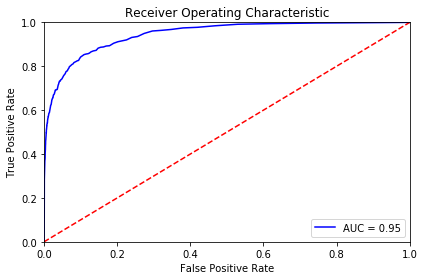

In [2020]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [2023]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y_test, y_pred_adj))
    
    cm1 = confusion_matrix(y_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2027]:
precision_recall_threshold(0.2)

Confusion Matrix: 

     pred_neg  pred_pos
neg      7615       419
pos       177       538

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      8034
         1.0       0.56      0.75      0.64       715

    accuracy                           0.93      8749
   macro avg       0.77      0.85      0.80      8749
weighted avg       0.94      0.93      0.94      8749

Specificity :  0.9478466517301469
Sensitivity: 0.7524475524475525


_____

## Random Forest accounting for class imbalance with class_weight parameter

In [2028]:
df1 = pd.read_csv('final_data.csv')

In [2029]:
#drop the columns that are not required 
df1 = df1.drop(columns=['Unnamed: 0',
 'Known_T2DM', 
 'HbA1c_correct',
 'hba1c_42',
 'insulin_prescribed',
 'diabetic_medication',
 'eGFR',
 'metabolic_risk', 
 'Prescriptions'], axis=1)

In [2030]:
#drop columns with missing target 
df1.dropna(subset=['hba1c_48'], inplace=True)

In [2031]:
#select the target and the features 
y1 = df1.pop('hba1c_48')
X1 = df1

In [2032]:
#split train-test split 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,random_state=123)

Random forest deals with missing values - however, sklearn does not work with np.nan and therefore, I will impute with out of sample value. 

Testing showed that out-of-sample provided a better option than imputing with mean (average AUC with out-of-sample: 0.9390834564964079 Vs average AUC with mean-imputation: 0.9377944297229611)

In [2033]:
#impute with out-of-sample value

X1_train.fillna(-999, inplace=True)
X1_test.fillna(-999, inplace=True)
y1_train.fillna(-999, inplace=True)
y1_test.fillna(-999, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1829]:
#instantiate the model 
clf1=RandomForestClassifier()

I will use a randomised search grid to tune the hyper-parameters of my model:  

- n_estimators 
- max_features 
- max_depth
- class_weight 


Class_weight will test whether accounting for class imbalance will improve the model 

In [1459]:
#optimise model using randomised search grid  but add in class_weight parameter 

#class_weight 
class_weight = ['None','balanced_subsample', 'balanced']

#estimators

n_estimators = list(range(1, 500, 50))

#max_features

max_features= list(range(1,50,10))

#max depth 
max_depth = list(range(1, 100, 10))

#hyperparameter dictionary 

hyperparameters = dict(n_estimators = n_estimators, max_features = max_features, max_depth = max_depth, class_weight = class_weight)


In [1460]:
model_optimisation = RandomizedSearchCV(clf1, hyperparameters, scoring='roc_auc', n_iter=3, random_state = 123, cv=2, verbose=1)

In [1461]:
best_model = model_optimisation.fit(X1_train, y1_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min finished


In [1462]:
best_model.best_params_

{'n_estimators': 451,
 'max_features': 31,
 'max_depth': 71,
 'class_weight': 'balanced'}

In [2034]:
#instantiate the model again 
clf1=RandomForestClassifier(class_weight = 'balanced', n_estimators = 451, max_features = 31, max_depth = 71, verbose = 1, random_state=123)

In [2035]:
clf1.fit(X1_train, y1_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:  1.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=71, max_features=31,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=451,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=1, warm_start=False)

In [1832]:
#evaluate AUC on train data
scores = cross_val_score(clf1, X1_train, y1_train, cv=2, scoring='roc_auc')
print(f"average AUC with optimisation: {np.mean(scores)}")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:   39.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:   40.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


average AUC with optimisation: 0.9533566275100536


[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    0.5s finished


In [1833]:
#evaluate AUC on test data
scores = cross_val_score(clf1, X1_test, y1_test, cv=2, scoring='roc_auc')
print(f"average AUC with optimisation: {np.mean(scores)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    0.2s finished


average AUC with optimisation: 0.9405030868312824


In [2036]:
#cross validation for predictions and probabilities 
y_pred = cross_val_predict(clf1, X1_test, y1_test, cv=5)
probs = cross_val_predict(clf1, X1_test, y1_test, cv=5, method='predict_proba')
preds = probs[:,1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [2037]:
#create dataframe 
outcome = pd.DataFrame(y1_test)
outcome.columns = ['HbA1c>48_actual']
outcome['HbA1c>48_predicted'] = y_pred
outcome.head()

HbA1c>48_actual  HbA1c>48_predicted
33452              0.0                 0.0
22635              0.0                 0.0
19978              0.0                 0.0
39820              0.0                 0.0
7061               0.0                 0.0

In [2038]:
outcome['HbA1c>48_actual'].value_counts(dropna=False)

0.0    8034
1.0     715
Name: HbA1c>48_actual, dtype: int64

In [2039]:
outcome['HbA1c>48_predicted'].value_counts(dropna=False)

0.0    8283
1.0     466
Name: HbA1c>48_predicted, dtype: int64

In [2040]:
print(classification_report(outcome['HbA1c>48_actual'], outcome['HbA1c>48_predicted'], target_names=['hba1c < 48', 'hba1c > 48']))

              precision    recall  f1-score   support

  hba1c < 48       0.96      0.99      0.97      8034
  hba1c > 48       0.81      0.53      0.64       715

    accuracy                           0.95      8749
   macro avg       0.89      0.76      0.81      8749
weighted avg       0.95      0.95      0.95      8749



In [2041]:
print(pd.DataFrame(confusion_matrix(outcome['HbA1c>48_actual'], outcome['HbA1c>48_predicted']), columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))


     pred_neg  pred_pos
neg      7947        87
pos       336       379


## AUC analysis and adjustment of probability threshold

In [2042]:
fpr, tpr, threshold = metrics.roc_curve(outcome['HbA1c>48_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

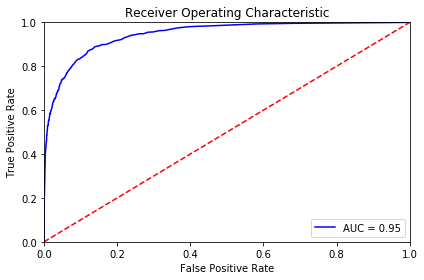

In [2043]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [2044]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y1_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y1_test, y_pred_adj))
    
    cm1 = confusion_matrix(y1_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2045]:
precision_recall_threshold(0.2)

Confusion Matrix: 

     pred_neg  pred_pos
neg      7680       354
pos       199       516

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      8034
         1.0       0.59      0.72      0.65       715

    accuracy                           0.94      8749
   macro avg       0.78      0.84      0.81      8749
weighted avg       0.94      0.94      0.94      8749

Specificity :  0.9559372666168783
Sensitivity: 0.7216783216783217


#### Is there an optimum threshold for probability?

In this classification problem, a false negative is the worse outcome and one we wish to avoid as this would mean that a patient who has poorly controlled diabetes would be missed and not receive any medical attention. 

Therefore, we wish to reduce the false negative rate (and optimise the sensitivity). 

However, if we are overly sensitive - then we will start having too many false positives which has potentially two impacts on the system: 
- Poor utilisation of resources as too much clinical time may be spent on patients who are not requiring a review or intervention 
- "Boy who cries wolf effect" - if a system is contantly suggesting false positives - clinicians may not trust this system and not pay adequate attention to it's findings. The Emergency Care Research Institute reports that hospital alarms among the top five greatest medical technology hazards!


#### Approaches...

**1: Iterate through different thresholds and find where the maximum F1 score occurs:**
This gave me a very high false positive rate


**2: Find the elbow point of false negatives with threholds:**
Again this gave a very high false positive rate 


**3: Manual assessment and comparison with known sensitivity and specificity of other medical diagnostic tests:**   
Using domain knowledge and comparison with other diagnostic tests, I will determine the best threshold for each model.


In [1479]:
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def false_neg(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    cm = confusion_matrix(y1_test, y_pred_adj)
    false_neg = cm[1][0]
    return(false_neg)


def false_pos(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    cm = confusion_matrix(y1_test, y_pred_adj)
    false_pos = cm[0][1]
    return(false_pos)
    

In [1480]:
x = []
y = []
z = []

for i in np.linspace(0,1, 100): 
    x.append(i)
    y.append(np.log(false_neg(i)))
    z.append(np.log(false_pos(i)))
    

divide by zero encountered in log


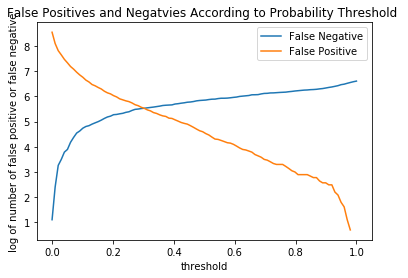

In [1481]:
plt.plot(x,y, label='False Negative')
plt.plot(x,z, label='False Positive')
plt.title('False Positives and Negatvies According to Probability Threshold ')
plt.ylabel("log of number of false positive or false negative")
plt.xlabel('threshold')
plt.legend()


_______

## Does SMOTE improve the model?

In [2046]:
df2 = pd.read_csv('final_data.csv')

In [2047]:
#drop the columns that are not required 
df2 = df2.drop(columns=['Unnamed: 0',
 'Known_T2DM', 
 'HbA1c_correct',
 'hba1c_42',
 'insulin_prescribed',
 'diabetic_medication',
 'eGFR',
 'metabolic_risk', 
 'Prescriptions'], axis=1)

In [2048]:
#drop columns with missing target 
df2.dropna(subset=['hba1c_48'], inplace=True)

In [2049]:
#select the target and the features 
y2 = df2.pop('hba1c_48')
X2 = df2

In [2050]:
#split train-test split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=123)

In [2051]:
#impute with out-of-sample value

X2_train.fillna(-999, inplace=True)
X2_test.fillna(-999, inplace=True)
y2_train.fillna(-999, inplace=True)
y2_test.fillna(-999, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2052]:
#account for class imbalance with SMOTE 
smt = SMOTE()
X2_train, y2_train = smt.fit_sample(X2_train, y2_train)

In [2053]:
#instantiate the model 
clf2=RandomForestClassifier()

In [2054]:
#SMOTE has re-balanced the classes and over-sampled the under-represented class
pd.DataFrame(y2_train)['hba1c_48'].value_counts()

1.0    23997
0.0    23997
Name: hba1c_48, dtype: int64

In [1497]:
#optimise model using randomised search grid  but no addition of class_weight as balanced dataset 

#estimators

n_estimators = list(range(1, 500, 50))

#max_features

max_features= list(range(1,50,10))

#max depth 
max_depth = list(range(1, 100, 10))

#hyperparameter dictionary 

hyperparameters = dict(n_estimators = n_estimators, max_features = max_features, max_depth = max_depth)

In [1498]:
model_optimisation = RandomizedSearchCV(clf2, hyperparameters, scoring='roc_auc', n_iter=3, random_state = 123, cv=2, verbose=2)

In [1499]:
best_model = model_optimisation.fit(X2_train, y2_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] n_estimators=251, max_features=11, max_depth=71 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. n_estimators=251, max_features=11, max_depth=71, total=  39.4s
[CV] n_estimators=251, max_features=11, max_depth=71 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s remaining:    0.0s


[CV] .. n_estimators=251, max_features=11, max_depth=71, total=  34.1s
[CV] n_estimators=101, max_features=31, max_depth=71 .................
[CV] .. n_estimators=101, max_features=31, max_depth=71, total=  49.2s
[CV] n_estimators=101, max_features=31, max_depth=71 .................
[CV] .. n_estimators=101, max_features=31, max_depth=71, total=  40.5s
[CV] n_estimators=101, max_features=21, max_depth=61 .................
[CV] .. n_estimators=101, max_features=21, max_depth=61, total=  32.2s
[CV] n_estimators=101, max_features=21, max_depth=61 .................
[CV] .. n_estimators=101, max_features=21, max_depth=61, total=  26.6s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.7min finished


In [1500]:
best_model.best_params_

{'n_estimators': 251, 'max_features': 11, 'max_depth': 71}

In [2055]:
#set the optimum model 
clf2=RandomForestClassifier(n_estimators = 251, max_features = 11, max_depth = 71, verbose = 1, random_state=123)

In [2056]:
#train model 
clf2.fit(X2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=71, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=251,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=1, warm_start=False)

In [1503]:
#evaluate AUC on train data
scores = cross_val_score(clf2, X2_train, y2_train, cv=2, scoring='roc_auc')
print(f"average AUC with optimisation: {np.mean(scores)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:   36.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:   32.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


average AUC with optimisation: 0.9951608111033201


[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.7s finished


In [1505]:
#evaluate AUC on test data
scores = cross_val_score(clf2, X2_test, y2_test, cv=2, scoring='roc_auc')
print(f"average AUC with optimisation: {np.mean(scores)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


average AUC with optimisation: 0.9434922149149295


[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished


In [2057]:
#cross validation for predictions and probabilities 
y_pred = cross_val_predict(clf2, X2_test, y2_test, cv=5)
probs = cross_val_predict(clf2, X2_test, y2_test, cv=5, method='predict_proba')
preds = probs[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [2058]:
outcome = pd.DataFrame(y2_test)
outcome.columns = ['HbA1c>48_actual']
outcome['HbA1c>48_predicted'] = y_pred
outcome.head()

HbA1c>48_actual  HbA1c>48_predicted
33452              0.0                 0.0
22635              0.0                 0.0
19978              0.0                 0.0
39820              0.0                 0.0
7061               0.0                 0.0

In [2059]:
print(classification_report(outcome['HbA1c>48_actual'], outcome['HbA1c>48_predicted'], target_names=['hba1c < 48', 'hba1c > 48']))

              precision    recall  f1-score   support

  hba1c < 48       0.96      0.99      0.98      8034
  hba1c > 48       0.83      0.56      0.67       715

    accuracy                           0.95      8749
   macro avg       0.90      0.77      0.82      8749
weighted avg       0.95      0.95      0.95      8749



In [2060]:
print(pd.DataFrame(confusion_matrix(outcome['HbA1c>48_actual'], outcome['HbA1c>48_predicted']), columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))


     pred_neg  pred_pos
neg      7953        81
pos       315       400


In [2061]:
fpr, tpr, threshold = metrics.roc_curve(outcome['HbA1c>48_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

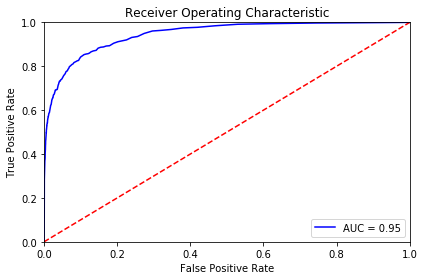

In [2062]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [2063]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y2_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y2_test, y_pred_adj))
    
    cm1 = confusion_matrix(y2_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2071]:
precision_recall_threshold(0.2)

Confusion Matrix: 

     pred_neg  pred_pos
neg      7615       419
pos       177       538

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      8034
         1.0       0.56      0.75      0.64       715

    accuracy                           0.93      8749
   macro avg       0.77      0.85      0.80      8749
weighted avg       0.94      0.93      0.94      8749

Specificity :  0.9478466517301469
Sensitivity: 0.7524475524475525


SMOTE provides similar performance to other models...

However, if I reduce the probability threshold even further to 0.15 - I can have a false negative rate of just 137 people but with 614 false positives (specificity 92% and sensitivity 80%). 

## Does Extreme Gradient Boosting improve the model? 


XGBoost stands for extreme gradient boosting and is a strategy that improves a model's accuracy. 

It is an ensemble approach that creates multiple models sequentially using the residuals or errors of prior models to inform further model development. XGBoost uses gradient descent to minimise the loss function when creating new models. In this way, the each individual decision tree in the random forest is a weak base model, but when combined with multiple other decision trees, the collective forest of models is more predictive with reduced variance. 


In [2072]:
#import data 
df3 = pd.read_csv('final_data.csv')

In [2073]:
#drop columns with missing target 
df3.dropna(subset=['hba1c_48'], inplace=True)

In [2074]:
#drop redundant columns 
df3 = df3.drop(columns=['Unnamed: 0',
 'Known_T2DM',
 'HbA1c_correct',
 'hba1c_42',
 'insulin_prescribed',
 'diabetic_medication',
 'eGFR',
 'metabolic_risk', 
 'Prescriptions'], axis=1)

In [2075]:
#isolate the target 
y3 = df3.pop('hba1c_48')
X3 = df3

In [2076]:
#split train-test split 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3,random_state=123)

In [1731]:
#instantiate the model 
xg_clf1 = xgb.XGBClassifier()

In [1732]:
#learning rate 

a = [0.001, 0.01, 0.1]

#estimators

n_estimators = list(range(1, 500, 50))

#subsample 

subsample = [0.5, 0.7, 1.0]

#max depth 
max_depth = list(range(1, 100, 10))

#scale_pos_weight 

scale_pos_weight = list(range(1,100,10))

#hyperparameter dictionary 

hyperparameters = dict(learning_rate = a, n_estimators = n_estimators, subsample = subsample,max_depth = max_depth, scale_pos_weight = scale_pos_weight)


In [1733]:
xg_clf_optimisation = RandomizedSearchCV(xg_clf1, hyperparameters, n_iter=3, random_state = 123, cv=2, verbose=2)

In [1734]:
best_model = xg_clf_optimisation.fit(X3_train, y3_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=451, max_depth=11, learning_rate=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=451, max_depth=11, learning_rate=0.01, total=  40.4s
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=451, max_depth=11, learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.4s remaining:    0.0s


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=451, max_depth=11, learning_rate=0.01, total=  38.9s
[CV] subsample=1.0, scale_pos_weight=81, n_estimators=201, max_depth=41, learning_rate=0.001 
[CV]  subsample=1.0, scale_pos_weight=81, n_estimators=201, max_depth=41, learning_rate=0.001, total=  34.7s
[CV] subsample=1.0, scale_pos_weight=81, n_estimators=201, max_depth=41, learning_rate=0.001 
[CV]  subsample=1.0, scale_pos_weight=81, n_estimators=201, max_depth=41, learning_rate=0.001, total=  34.3s
[CV] subsample=0.7, scale_pos_weight=91, n_estimators=151, max_depth=71, learning_rate=0.01 
[CV]  subsample=0.7, scale_pos_weight=91, n_estimators=151, max_depth=71, learning_rate=0.01, total=  27.3s
[CV] subsample=0.7, scale_pos_weight=91, n_estimators=151, max_depth=71, learning_rate=0.01 
[CV]  subsample=0.7, scale_pos_weight=91, n_estimators=151, max_depth=71, learning_rate=0.01, total=  26.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.4min finished


In [1849]:
best_model.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 11,
 'n_estimators': 100,
 'max_depth': 31,
 'learning_rate': 0.1}

In [2077]:
xg_clf1 = xgb.XGBClassifier(subsample=0.7, scale_pos_weight = 91, n_estimators = 151, max_depth = 71, learning_rate = 0.01, random_state=123, verbosity=1)

In [2078]:
xg_clf1.fit(X3_train, y3_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=71,
              min_child_weight=1, missing=None, n_estimators=151, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=91, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [1852]:
scores = cross_val_score(xg_clf1, X3_train, y3_train, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

average AUC: 0.9506228971378439


In [1854]:
scores = cross_val_score(xg_clf1, X3_test, y3_test, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

average AUC: 0.9342791137563637


In [2079]:
#cross validation for predictions and probabilities 
y_pred = cross_val_predict(xg_clf1, X3_test, y3_test, cv=5)
probs = cross_val_predict(xg_clf1, X3_test, y3_test, cv=5, method='predict_proba')
preds = probs[:,1]

In [2080]:
#create dataframe 
outcome = pd.DataFrame(y3_test)
outcome.columns = ['HbA1c>48_actual']
outcome['HbA1c>48_predicted'] = y_pred
outcome.head()

HbA1c>48_actual  HbA1c>48_predicted
33452              0.0                 0.0
22635              0.0                 0.0
19978              0.0                 0.0
39820              0.0                 0.0
7061               0.0                 0.0

In [2081]:
fpr, tpr, threshold = metrics.roc_curve(outcome['HbA1c>48_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

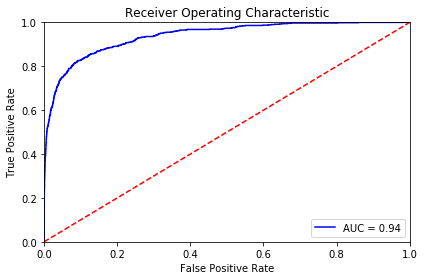

In [2082]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_model1.png')


In [2083]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y3_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y3_test, y_pred_adj))
    
    cm1 = confusion_matrix(y3_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2092]:
precision_recall_threshold(0.35)

Confusion Matrix: 

     pred_neg  pred_pos
neg      7343       691
pos       132       583

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95      8034
         1.0       0.46      0.82      0.59       715

    accuracy                           0.91      8749
   macro avg       0.72      0.86      0.77      8749
weighted avg       0.94      0.91      0.92      8749

Specificity :  0.9139905402041324
Sensitivity: 0.8153846153846154


XGBoost provided a slightly improved model compared to random forest as it reduced the false negative rate with only a slight increase in false positive rates. It provided the best balance between sensitivity and specificity.


For future models I will focus on XGBoost RF classifiers. 

______________

## SHAP importance


SHAP values measure the influence of a feature by comparing model predictions with and without the feature. It takes into account the bias in classic feature importance for continuous variables. It is a method to start exploring black-box models such as XGBoost ensembles. 

In [1867]:
shap.initjs()

In [2093]:
explainer = shap.TreeExplainer(xg_clf1)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [2094]:
shap_values = explainer.shap_values(X3_train,approximate=True, tree_limit=10)

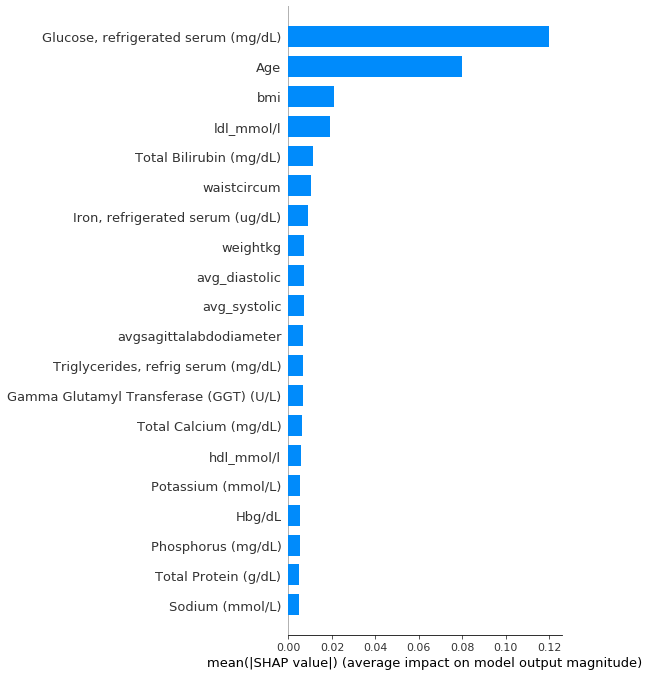

In [2095]:
shap.summary_plot(shap_values, X3_train, plot_type="bar")

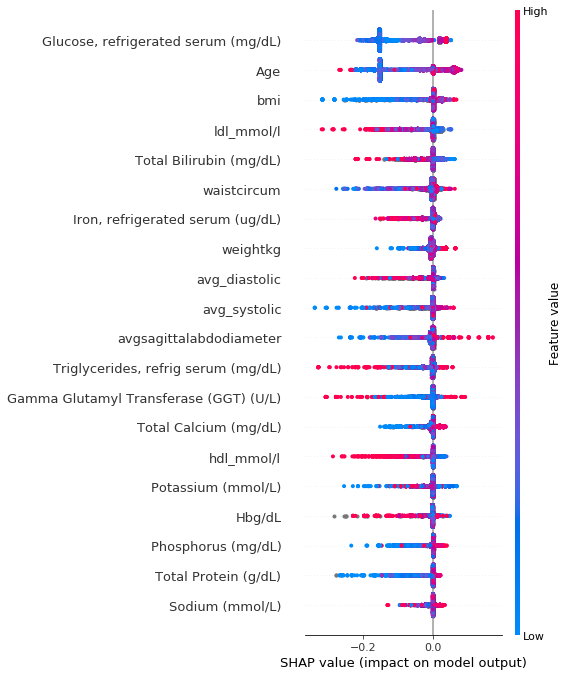

In [1945]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
shap.summary_plot(shap_values, X3_train, show=False)
plt.savefig('shap_2.png')


These SHAP values suggest that this model disproportionately relies on glucose to determine who has poor diabetic control (as defined by a HbA1c > 48). Low levels of random blood glucose was strongly associated with reducing the chance of being classified as having poor control of diabetes. High levels of glucose did not appear to be significant in shaping classification. 

Age and BMI are as expected with high age, waist circumference and BMI both leading to more classification in the poor control category. However, being of low age and bmi was more important. 



_______

## How predictive is the model without any measurement of glucose? 

The above model is very reliant on glucose. But how predictive is the model without any metric of glucose?

In [2096]:
#import data 
df4 = pd.read_csv('final_data.csv')

In [2097]:
#drop columns with missing target 
df4.dropna(subset=['hba1c_48'], inplace=True)

In [2098]:
#drop redundant columns 
df4 = df4.drop(columns=[
 'Unnamed: 0',
 'Known_T2DM',
 'HbA1c_correct',
 'hba1c_42',
 'insulin_prescribed',
 'diabetic_medication',
 'eGFR',
 'metabolic_risk', 
 'Prescriptions',
'Glucose, refrigerated serum (mg/dL)'], axis=1)

In [2099]:
#isolate the target 
y4 = df4.pop('hba1c_48')
X4 = df4

In [2100]:
#split train-test split 
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4,random_state=123)

In [1577]:
#instantiate the model 
xg_clf2 = xgb.XGBClassifier()

In [1578]:
#learning rate 

a = [0.001, 0.01, 0.1]

#estimators

n_estimators = list(range(1, 500, 50))

#subsample 

subsample = [0.5, 0.7, 1.0]

#max depth 
max_depth = list(range(1, 100, 10))

#scale_pos_weight 

scale_pos_weight = list(range(1,100,10))

#hyperparameter dictionary 

hyperparameters = dict(learning_rate = a, n_estimators = n_estimators, subsample = subsample,max_depth = max_depth, scale_pos_weight = scale_pos_weight)


In [2101]:
xg_clf_optimisation = RandomizedSearchCV(xg_clf2, hyperparameters, n_iter=3, random_state = 123, cv=2, verbose=2)

In [1580]:
best_model = xg_clf_optimisation.fit(X4_train, y4_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=451, max_depth=11, learning_rate=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=451, max_depth=11, learning_rate=0.01, total=  42.7s
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=451, max_depth=11, learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.7s remaining:    0.0s


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=451, max_depth=11, learning_rate=0.01, total=  41.5s
[CV] subsample=1.0, scale_pos_weight=81, n_estimators=201, max_depth=41, learning_rate=0.001 
[CV]  subsample=1.0, scale_pos_weight=81, n_estimators=201, max_depth=41, learning_rate=0.001, total=  51.6s
[CV] subsample=1.0, scale_pos_weight=81, n_estimators=201, max_depth=41, learning_rate=0.001 
[CV]  subsample=1.0, scale_pos_weight=81, n_estimators=201, max_depth=41, learning_rate=0.001, total=  48.1s
[CV] subsample=0.7, scale_pos_weight=91, n_estimators=151, max_depth=71, learning_rate=0.01 
[CV]  subsample=0.7, scale_pos_weight=91, n_estimators=151, max_depth=71, learning_rate=0.01, total=  37.8s
[CV] subsample=0.7, scale_pos_weight=91, n_estimators=151, max_depth=71, learning_rate=0.01 
[CV]  subsample=0.7, scale_pos_weight=91, n_estimators=151, max_depth=71, learning_rate=0.01, total=  37.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.3min finished


In [1581]:
best_model.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 91,
 'n_estimators': 151,
 'max_depth': 71,
 'learning_rate': 0.01}

In [2102]:
xg_clf2 = xgb.XGBClassifier(subsample=0.7, scale_pos_weight = 91, n_estimators = 151, max_depth = 71, learning_rate = 0.01, random_state=123, verbosity=1)

In [2103]:
xg_clf2.fit(X4_train, y4_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=71,
              min_child_weight=1, missing=None, n_estimators=151, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=91, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [1879]:
scores = cross_val_score(xg_clf2, X4_train, y4_train, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

average AUC: 0.8372119025301616


In [1880]:
scores = cross_val_score(xg_clf2, X4_test, y4_test, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

average AUC: 0.8137078342587405


In [2104]:
#cross validation for predictions and probabilities 
y_pred = cross_val_predict(xg_clf2, X4_test, y4_test, cv=5)
probs = cross_val_predict(xg_clf2, X4_test, y4_test, cv=5, method='predict_proba')
preds = probs[:,1]

In [2105]:
#create dataframe 
outcome = pd.DataFrame(y4_test)
outcome.columns = ['HbA1c>48_actual']
outcome['HbA1c>48_predicted'] = y_pred
outcome.head()

HbA1c>48_actual  HbA1c>48_predicted
33452              0.0                 0.0
22635              0.0                 0.0
19978              0.0                 0.0
39820              0.0                 0.0
7061               0.0                 1.0

In [2106]:
outcome['HbA1c>48_actual'].value_counts()

0.0    8034
1.0     715
Name: HbA1c>48_actual, dtype: int64

In [2107]:
outcome['HbA1c>48_predicted'].value_counts()

0.0    7898
1.0     851
Name: HbA1c>48_predicted, dtype: int64

In [2108]:
fpr, tpr, threshold = metrics.roc_curve(outcome['HbA1c>48_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

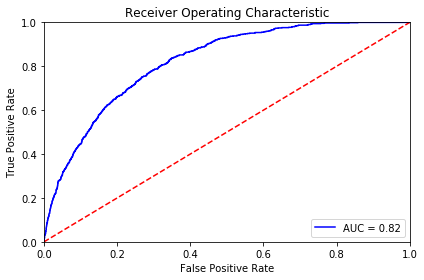

In [2109]:

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('ROC_model4.png')


In [2110]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y4_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y4_test, y_pred_adj))
    
    cm1 = confusion_matrix(y4_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2113]:
precision_recall_threshold(0.35)

Confusion Matrix: 

     pred_neg  pred_pos
neg      6694      1340
pos       276       439

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8034
         1.0       0.25      0.61      0.35       715

    accuracy                           0.82      8749
   macro avg       0.60      0.72      0.62      8749
weighted avg       0.90      0.82      0.85      8749

Specificity :  0.833208862335076
Sensitivity: 0.6139860139860139


This suggests that the model does not perform well in the absence of any measurement of glucose.  


#### Exploration of SHAP values

In [1894]:
explainer = shap.TreeExplainer(xg_clf2)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [1895]:
shap_values = explainer.shap_values(X4_train,approximate=True, tree_limit=10)

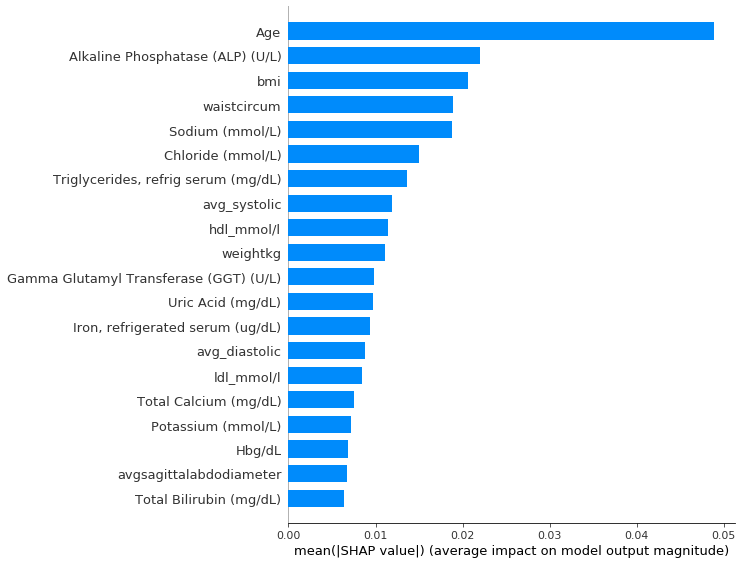

In [1896]:
shap.summary_plot(shap_values, X4_train, plot_type="bar")

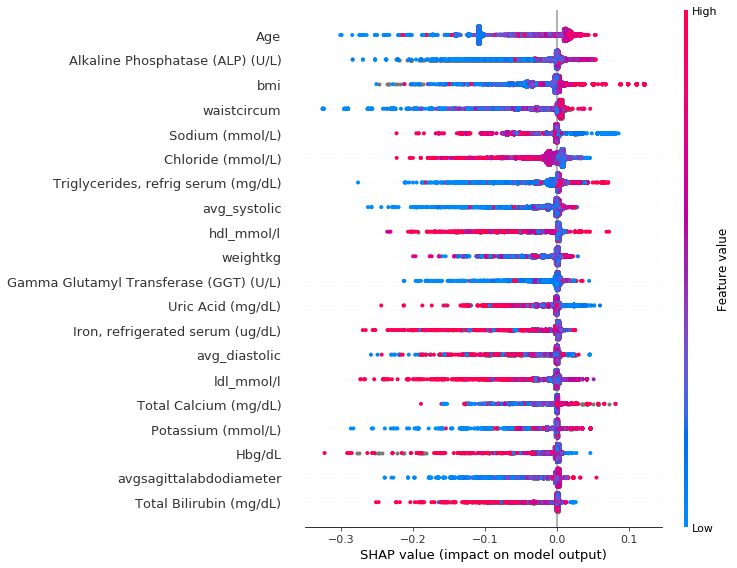

In [1897]:
shap.summary_plot(shap_values, X4_train)

As expeceted age, BMI and waist circum are associated with poor control. 
Interestingly, ALP and chloride has high importance - unsure how this relates clinically... perhaps another avenue for further research? ALP has previously been found to be increased in diabetes - although the strength of this relationship has been questioned. 

Otherwise the features are similar to model where glucose was included...

_______

## Analysis of Errors

Now I will interrogate the false negatives to see if there is any systematic difference in features that would contribute to such a classification. 

To do this I will: 
- Adjust the probability threshold 
- Create a new column with prediction 
- Create a new column with either false negative or true positive 
- Add this to the original dataframe (i.e. X_test) 
- Analyse whether systematic difference between false neg and true positive within this cohort.

In [1603]:
#reinstate the model 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=123)
xg_clf1.fit(X3_train, y3_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=71,
              min_child_weight=1, missing=None, n_estimators=151, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=91, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [1604]:
#get predictions and probabilities 
y_pred = cross_val_predict(xg_clf1, X3_test, y3_test, cv=5)
probs = cross_val_predict(xg_clf1, X3_test, y3_test, cv=5, method='predict_proba')
preds = probs[:,1]

In [1605]:
#create dataframe 
outcome = pd.DataFrame(y3_test)
outcome.columns = ['HbA1c>48_actual']
outcome['HbA1c>48_predicted'] = y_pred
outcome.head()

HbA1c>48_actual  HbA1c>48_predicted
33452              0.0                 0.0
22635              0.0                 0.0
19978              0.0                 0.0
39820              0.0                 0.0
7061               0.0                 0.0

In [1606]:
#adjust prediction based on lower probability threshold and create a new column with the adjusted classification 

def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def adjusted_array(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    return(y_pred_adj)

In [1607]:
#create a new column with prediction 
outcome['adjusted_prediction'] = adjusted_array(0.4)

In [1608]:
outcome.drop(['HbA1c>48_predicted'], axis=1, inplace=True)

In [1609]:
outcome.head()

HbA1c>48_actual  adjusted_prediction
33452              0.0                    0
22635              0.0                    0
19978              0.0                    0
39820              0.0                    0
7061               0.0                    1

In [1610]:
#Identify patients who received a false negative

outcome['false_neg'] = np.where((outcome['HbA1c>48_actual'] == 1) & (outcome['adjusted_prediction']==0), 1,0) 
outcome['true_pos'] = np.where((outcome['HbA1c>48_actual'] == 1) & (outcome['adjusted_prediction']==1), 1,0) 

In [1611]:
#outcome 

outcome.head()

HbA1c>48_actual  adjusted_prediction  false_neg  true_pos
33452              0.0                    0          0         0
22635              0.0                    0          0         0
19978              0.0                    0          0         0
39820              0.0                    0          0         0
7061               0.0                    1          0         0

In [1612]:
outcome['false_neg'].value_counts()

0    8601
1     148
Name: false_neg, dtype: int64

In [1613]:
outcome['true_pos'].value_counts()

0    8182
1     567
Name: true_pos, dtype: int64

In [1614]:
#create a false negative column in the original dataframe 
X3_test['false_neg'] = outcome['false_neg'].copy()
X3_test['true_pos'] = outcome['true_pos'].copy()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1615]:
#mask to identify false negaties 
false_neg_m = X3_test['false_neg'] ==1 
false_neg_df = X3_test[false_neg_m]


In [1616]:
#true pos mask 
true_pos_m = X3_test['true_pos'] == 1
true_pos_df = X3_test[true_pos_m]

In [1617]:
#top 20 features 

features = [
    'Glucose, refrigerated serum (mg/dL)',
    'Age',
    'bmi',
    'Hbg/dL',
    'waistcircum',
    'ldl_mmol/l',
    'Total Bilirubin (mg/dL)',
    'Iron, refrigerated serum (ug/dL)',
    'tchol_mmol/l',
    'Phosphorus (mg/dL)',
    'hdl_mmol/l',
    'avgsagittalabdodiameter',
    'avg_diastolic',
    'avg_systolic',
    'Cholesterol, refrigerated serum (mg/dL)',
    'Total Calcium (mg/dL)',
    'Triglycerides, refrig serum (mg/dL)',
    'Gamma Glutamyl Transferase (GGT) (U/L)',
    'Alkaline Phosphatase (ALP) (U/L)', 
    'Sodium (mmol/L)']

In [1618]:
errors = pd.DataFrame(zip(true_pos_df[features].median()),(false_neg_df[features].median()))
errors = errors.reset_index()

In [1619]:
errors.columns = ['True Pos', 'False Neg']

In [1620]:
errors['Features'] = features

In [1621]:
errors.set_index('Features')

True Pos   False Neg
Features                                                       
Glucose, refrigerated serum (mg/dL)      102.000000  175.000000
Age                                       60.000000   61.000000
bmi                                       30.600000   31.520000
Hbg/dL                                    14.200000   14.500000
waistcircum                              106.700000  108.600000
ldl_mmol/l                                 2.896000    2.900000
Total Bilirubin (mg/dL)                    0.600000    0.600000
Iron, refrigerated serum (ug/dL)          75.000000   78.000000
tchol_mmol/l                               5.090000    5.070000
Phosphorus (mg/dL)                         3.800000    3.700000
hdl_mmol/l                                 1.190000    1.140000
avgsagittalabdodiameter                   24.750000   26.200000
avg_diastolic                             69.333333   71.333333
avg_systolic                             128.666667  128.666667
Cholesterol, refrigerated serum (mg/dL)  193.000000  197.000000
Total Calcium (mg/dL)                      9.500000    9.500000
Triglycerides, refrig serum (mg/dL)      151.000000  184.000000
Gamma Glutamyl Transferase (GGT) (U/L)    23.000000   30.000000
Alkaline Phosphatase (ALP) (U/L)          71.000000   76.000000
Sodium (mmol/L)                          140.000000  138.000000

In [888]:
df[['Glucose, refrigerated serum (mg/dL)', 'Cholesterol, refrigerated serum (mg/dL)']].median()

Glucose, refrigerated serum (mg/dL)         92.0
Cholesterol, refrigerated serum (mg/dL)    193.0
dtype: float64

**Table:** Median values for the top 20 features according to whether participant was a True Pos or a False Neg 

This table suggests that participants who were wrongly classified as negative had much higher median glucose and lipids than participants who were correctly classified as being poorly controlled. Particularly, glucose refrigerated serum - this means that the model is misclassifying extreme values of glucose as being negative whereas infact they should be a true positive. 



## Other Alternatives 

**Turn this into a regression problem where I try to predict the HbA1c based on the other variables.**

       - Random Forest optimised model (RMSE: 5.847) 
       - XGBoost Regressor optimised model (RMSE: 5.976)
       
- Main issues with regression approach is that the residuals systematically increase as HbA1c increases ...
- Advantage with regression approach is that it avoids a binary classification (there may not be much of a clinical difference between 47 and 48 mmol/L, whereas a binary model suggests that there is)

**Reduce the threshold to 42 mmol/L from 48 mmol/L**

- This did not perform as well and had a poorer ability to discriminate between poor control vs good control or non-diabetic


__________

## Model 2: Develop a model to predict what treatment a patient is currently receiving


Population: full dataset 

Model: 
- XGBoost - binary XGBoost Model ... focusing on this model as it provided the optimal solution to the previous problem. 

Target: 
- Insulin

Features: 
Restricted to features that would be available on electronic health record at Major UK Hospital. 

- Demographics 
- Observations 
- Labs 


#### Results of Model 2

| Model | Test AUC | Probability Threshold | False Negative | False Positive | Sensitivity | Specificity
| --- | --- | --- | --- |--- | --- | --- |
| XGBoost to predict insulin in full dataset | 0.9531 | 0.05 | 87 (0.8%) | 506 (4.7%) | 70.51%| 95.18% |  
| XGBoost to predict insulin in patients with probable diabetes | 0.8607 | 0.05 | 38 (1.86%) | 219 (10.73%) | 77.12%| 88.31%|
| --- | --- | --- | --- |--- | --- | --- |
| XGBoost to predict anti-diabetic oral medication in full dataset | 0.9289 |0.075 | 183 (1.69%) | 946 (8.76%) | 75.92% | 90.56% |
|XGBoost to predict anti-diabetic oral medication in patients with probable diabetes |0.8405 | 0.1 | 60 (2.94%) | 548 (26.86%) | 86.78% | 65.47% |
| --- | --- | --- | --- |--- | --- | --- |





Test Population Size: 10,788  
Test Diabetes Cohort: 2,040





## Insulin Treatment: XGBoost Model 

In [2114]:
#import 
df5 = pd.read_csv('final_data.csv')

In [2115]:
#drop redundant 
df5.drop(columns = [
 'Unnamed: 0',
 'Known_T2DM', 
'Prescriptions',
 'hba1c_48',
 'hba1c_42',
 'diabetic_medication',
 'metabolic_risk'], axis=1, inplace=True)

In [2116]:
#target selection
y5= df5.pop('insulin_prescribed')
X5 = df5

In [2117]:
#split test-train 
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5,random_state=123)

In [1902]:
import xgboost as xgb
xg_clf3 = xgb.XGBClassifier()

In [1968]:
#learning rate 

a = [0.001, 0.01, 0.1]

#estimators

n_estimators = [100, 200, 300, 400, 500]

#subsample 

subsample = [0.5, 0.7, 1.0]

#max depth 
max_depth = list(range(1, 100, 10))

#scale_pos_weight 

scale_pos_weight = list(range(1,100,10))

#hyperparameter dictionary 

hyperparameters = dict(learning_rate = a, n_estimators = n_estimators, subsample = subsample,max_depth = max_depth, scale_pos_weight = scale_pos_weight)


In [1763]:
from sklearn.model_selection import RandomizedSearchCV

In [1764]:
xg_clf_optimisation = RandomizedSearchCV(xg_clf3, hyperparameters, n_iter = 2, random_state = 123, cv=3, verbose=3)
    

In [1765]:
# Fit randomized search
best_model = xg_clf_optimisation.fit(X5_train, y5_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, score=0.973, total= 1.2min
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, score=0.974, total= 1.1min
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, score=0.973, total= 1.1min
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, score=0.973, total=  17.6s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, score=0.975, total=  17.0s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, score=0.973, total=  17.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.2min finished


In [1766]:
best_model.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 11,
 'n_estimators': 100,
 'max_depth': 31,
 'learning_rate': 0.1}

In [2118]:
#fit model 
xg_clf3 = xgb.XGBClassifier(subsample=0.7, scale_pos_weight = 11, n_estimators = 100, max_depth = 31, learning_rate = 0.1, random_state=123, verbosity=1)

In [2119]:
xg_clf3.fit(X5_train, y5_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=31,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [1906]:
#score the model 
scores = cross_val_score(xg_clf3, X5_train, y5_train, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

average AUC: 0.9531379431027842


In [1907]:
#score the model 
scores = cross_val_score(xg_clf3, X5_test, y5_test, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

average AUC: 0.9435487254150017


In [2120]:
#get predictions and probabilities 
y_pred = cross_val_predict(xg_clf3, X5_test, y5_test, cv=5)
probs = cross_val_predict(xg_clf3, X5_test, y5_test, cv=5, method='predict_proba')
preds = probs[:,1]

In [2121]:
#create dataframe 
outcome = pd.DataFrame(y5_test)
outcome.columns = ['insulin_actual']
outcome['insulin_predicted'] = y_pred
outcome.head()

insulin_actual  insulin_predicted
42346               0                  0
24301               0                  0
22420               0                  0
17146               0                  0
17776               0                  0

In [2122]:
fpr, tpr, threshold = metrics.roc_curve(outcome['insulin_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

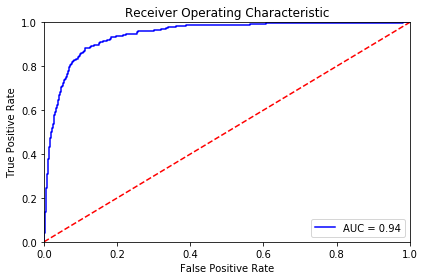

In [2123]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc5')

In [2124]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y5_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y5_test, y_pred_adj))
    
    cm1 = confusion_matrix(y5_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2128]:
precision_recall_threshold(0.05)

Confusion Matrix: 

     pred_neg  pred_pos
neg      9987       506
pos        87       208

Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10493
           1       0.29      0.71      0.41       295

    accuracy                           0.95     10788
   macro avg       0.64      0.83      0.69     10788
weighted avg       0.97      0.95      0.96     10788

Specificity :  0.9517773753931192
Sensitivity: 0.7050847457627119


In [2129]:
explainer = shap.TreeExplainer(xg_clf3)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [2130]:
shap_values = explainer.shap_values(X5_train, approximate=True, tree_limit=100)

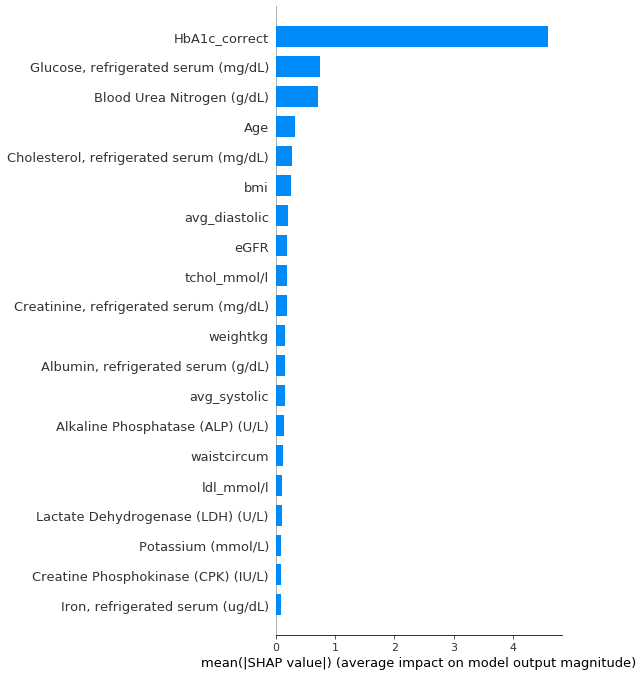

In [2131]:
shap.summary_plot(shap_values, X5_train, plot_type="bar")

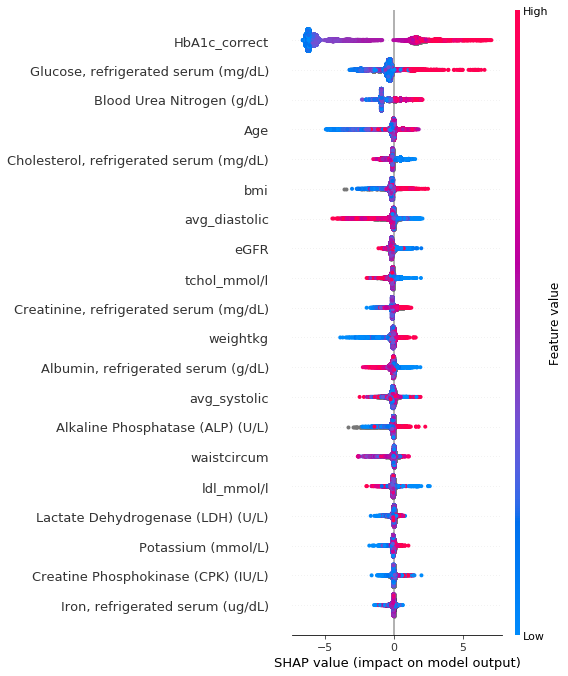

In [2132]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
shap.summary_plot(shap_values, X5_train, show=False)
plt.savefig('shap_3.png')

_______

This model suggests that it is possible to predict what participants were currently prescribed insulin with somewhat promising sensitivity and specificity when just restricting to laboratory measurements. 

Furthermore, it is surprising that the 3rd most important feature was blood urea nitrogen more important than BMI and age. There are limited studies citing the fact that urea is associated with worse insulin resistance, independent of kidney function. One other study has reported that high urea was associated with an increased requirement for insulin therapy, a finding that is repeated in the present study. 

Therefore, this finding provides further substantiation that blood urea nitrogen may indeed represent a marker for insulin resistance and the requirement for insulin therapy. 

_____

## Is the model improved if it is restricted to only assessing people with likely diabetes?


This dataset is much smaller (n=8,159). Note I am using the same XGBoost model for this. 

Model does not perform as well - only mild improvement in specificity. 

In [2133]:
#import 
df6 = pd.read_csv('final_data.csv')

In [2135]:
#drop redundant 
df6.drop(columns = [
 'Unnamed: 0',
 'Known_T2DM', 
'Prescriptions',
 'hba1c_48',
 'hba1c_42',
 'diabetic_medication'], axis=1, inplace=True)

In [2136]:
#restrict to metabolic_risk = 1
metabolic_risk_m = df6['metabolic_risk'] == 1
df6 = df6[metabolic_risk_m]

In [2137]:
df6.shape

(8159, 42)

In [2138]:
#target selection 
y6 = df6.pop('insulin_prescribed')

In [2139]:
X6 = df6

In [2140]:
#split test train 
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=123)

In [941]:
#instantiate the model 
import xgboost as xgb
xg_clf4 = xgb.XGBClassifier()


In [942]:
#learning rate 

a = [0.001, 0.01, 0.1]

#estimators

n_estimators = [100, 200, 300, 400, 500]

#subsample 

subsample = [0.5, 0.7, 1.0]

#max depth 
max_depth = list(range(1, 100, 10))

#scale_pos_weight 

scale_pos_weight = list(range(1,100,10))

#hyperparameter dictionary 

hyperparameters = dict(learning_rate = a, n_estimators = n_estimators, subsample = subsample,max_depth = max_depth, scale_pos_weight = scale_pos_weight)


In [943]:
xg_clf_optimisation = RandomizedSearchCV(xg_clf4, hyperparameters, n_iter = 2, random_state = 123, cv=3, verbose=2)
    

In [944]:
# Fit randomized search
best_model = xg_clf_optimisation.fit(X6_train, y6_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, total=  11.6s
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, total=  11.7s
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, total=  11.5s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, total=   3.5s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, total=   3.5s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, total=   3.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   45.3s finished


In [945]:
best_model.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 41,
 'n_estimators': 500,
 'max_depth': 31,
 'learning_rate': 0.1}

In [2143]:
#adjust parameters 
xg_clf4 = xgb.XGBClassifier(subsample=0.5, scale_pos_weight = 41, n_estimators = 500, max_depth = 31, learning_rate = 0.1, random_state=123, verbosity=3)

In [947]:
#score the model 
scores = cross_val_score(xg_clf4, X6_train, y6_train, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

[17:24:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=23
[17:24:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=21
[17:24:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=18
[17:24:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=31
[17:24:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=21
[17:24:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=27
[17:24:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=31
[17:24:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=29
[17:24:30] INFO: src/tree/updater_prune.

[17:24:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=15
[17:24:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=16
[17:24:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=19
[17:24:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=13
[17:24:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=12
[17:24:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=11
[17:24:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=19
[17:24:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=12
[17:24:32] INFO: src/tree/updater_prune.cc:74: 

[17:24:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=8
[17:24:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[17:24:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[17:24:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=13
[17:24:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=8
[17:24:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[17:24:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=11
[17:24:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[17:24:34] INFO: src/tree/updater_prune.cc:74: tree p

[17:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[17:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=8
[17:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[17:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=8
[17:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:24:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[17:24:35] INFO: src/tree/updater_prune.cc:74: tree prun

[17:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[17:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:24:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:24:36] INFO: src/tree/updater_prune.cc:74: tree prun

[17:24:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:24:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:24:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[17:24:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:24:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:24:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:37] INFO: src/tree/updater_prune.cc:74: tree prun

[17:24:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:24:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:24:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:24:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:38] INFO: src/tree/updater_prune.cc:74: tree prun

[17:24:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=23
[17:24:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=20
[17:24:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=23
[17:24:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=19
[17:24:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=16
[17:24:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=18
[17:24:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=19
[17:24:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=21
[17:24:39] INFO: src/tree/updater_prune.

[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=12
[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=9
[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=8
[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=8
[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=9
[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[17:24:41] INFO: src/tree/updater_prune.cc:74: tree pr

[17:24:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=8
[17:24:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[17:24:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=8
[17:24:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:24:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:24:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:24:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:24:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=9
[17:24:42] INFO: src/tree/updater_prune.cc:74: tree prun

[17:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[17:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[17:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[17:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:24:43] INFO: src/tree/updater_prune.cc:74: tree prun

[17:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:24:44] INFO: src/tree/updater_prune.cc:74: tree prun

[17:24:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:24:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:24:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:24:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:24:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:24:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:24:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:45] INFO: src/tree/updater_prune.cc:74: tree prun

[17:24:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:24:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=6
[17:24:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:24:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:24:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:24:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:24:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:24:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:24:46] INFO: src/tree/updater_prune.cc:74: tree prun

In [2145]:
xg_clf4.fit(X6_train, y6_train)

[23:32:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=23
[23:32:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=31
[23:32:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=28
[23:32:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 0 pruned nodes, max_depth=28
[23:32:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 300 extra nodes, 0 pruned nodes, max_depth=29
[23:32:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=27
[23:32:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 0 pruned nodes, max_depth=31
[23:32:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 0 pruned nodes, max_depth=25
[23:32:02] INFO: src/tree/updater_prune.

[23:32:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=19
[23:32:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=15
[23:32:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=16
[23:32:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=18
[23:32:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=14
[23:32:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=16
[23:32:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=18
[23:32:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=13
[23:32:07] INFO: src/tree/updater_prune.

[23:32:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=13
[23:32:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=13
[23:32:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=10
[23:32:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=17
[23:32:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=11
[23:32:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=15
[23:32:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=12
[23:32:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=11
[23:32:10] INFO: src/tree/updater_prune.cc:

[23:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[23:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=9
[23:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=8
[23:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[23:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[23:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[23:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[23:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[23:32:13] INFO: src/tree/updater_prune.cc:74: tree prun

[23:32:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[23:32:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[23:32:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[23:32:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[23:32:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[23:32:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[23:32:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[23:32:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=9
[23:32:16] INFO: src/tree/updater_prune.cc:74: tree prun

[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=9
[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=8
[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=10
[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[23:32:18] INFO: src/tree/updater_prune.cc:74: tree pru

[23:32:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[23:32:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[23:32:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[23:32:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[23:32:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[23:32:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=8
[23:32:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[23:32:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[23:32:20] INFO: src/tree/updater_prune.cc:74: tree prun

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=31,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=41, seed=None,
              silent=None, subsample=0.5, verbosity=3)

In [2146]:
#get predictions and probabilities 
y_pred = xg_clf4.predict(X6_test)
probs = xg_clf4.predict_proba(X6_test)
preds = probs[:,1]

In [2147]:
#create dataframe 
outcome = pd.DataFrame(y6_test)
outcome.columns = ['insulin_actual']
outcome['insulin_predicted'] = y_pred
outcome.head()

insulin_actual  insulin_predicted
6071                0                  0
6020                0                  1
27922               0                  0
17632               0                  1
22454               0                  0

In [2148]:
fpr, tpr, threshold = metrics.roc_curve(outcome['insulin_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

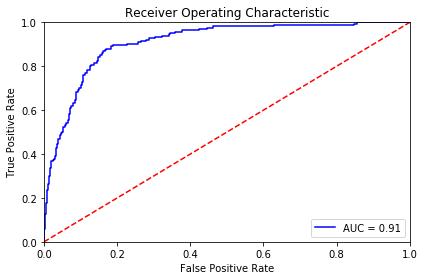

In [2149]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [2152]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y6_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y6_test, y_pred_adj))
    
    cm1 = confusion_matrix(y6_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2154]:
precision_recall_threshold(0.05)

Confusion Matrix: 

     pred_neg  pred_pos
neg      1655       219
pos        38       128

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1874
           1       0.37      0.77      0.50       166

    accuracy                           0.87      2040
   macro avg       0.67      0.83      0.71      2040
weighted avg       0.93      0.87      0.89      2040

Specificity :  0.8831376734258272
Sensitivity: 0.7710843373493976


This model performs better when restricted to just patients with likely diabetes. 

#### Feature Importance using SHAP values 

In [955]:
explainer = shap.TreeExplainer(xg_clf4)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [956]:
shap_values = explainer.shap_values(X6_train, approximate=True, tree_limit=100)

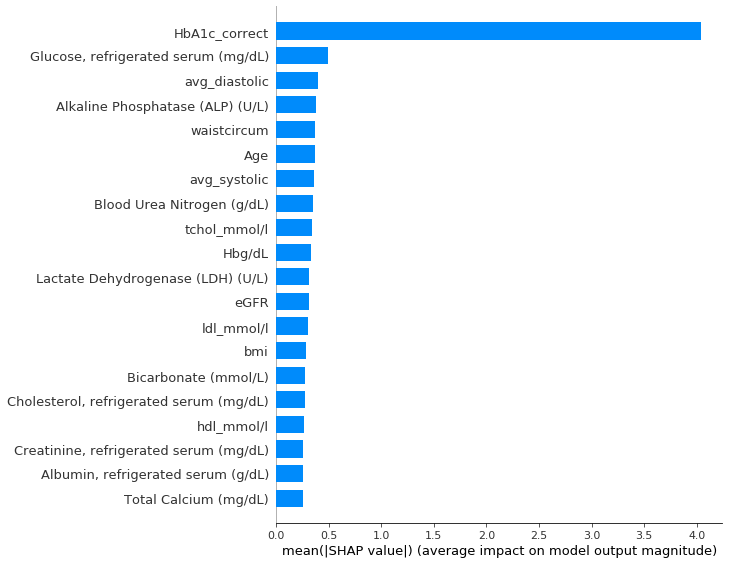

In [957]:
shap.summary_plot(shap_values, X6_train, plot_type="bar")

[17:36:02] ======== Monitor: Learner ========
[17:36:02] ======== Monitor: GBTree ========
[17:36:02] ======== Monitor: Learner ========
[17:36:02] ======== Monitor: GBTree ========


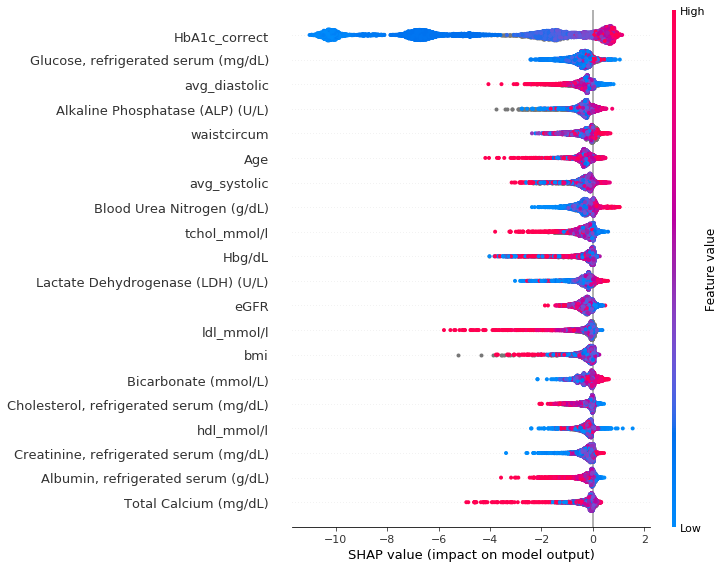

In [959]:
shap.summary_plot(shap_values, X6_train)

Interestingly, for this cohort of people with likely diabetes, blood urea nitrogen is less significant. 
Therefore, this may suggest that BUN is only important in a context where we are investigating in assessing whether a patient has insulin resistance Y/N rather than as a prognostic factor once insulin resistance has been established. 

Also, the SHAP summary plot suggests that again low HbA1c is driving the prediction. High age reduces the possibility of being prescribed insulin. This may be due to clinicians reluctance to prescribed insulin to patients who are elderly due to possible complications such as hypoglycaemic episodes. Other features such as ldl, tchol, avg_systolic BP again when higher have lower predictions of having insulin - again suggesting that in a cohort of diabetic patients, having comorbidities reduces likelihood of being prescribed insulin. This phenomenon was not seen when I analysed the entire dataset. 

_____

## Predict who required metformin or SU or GLP agonists

In [2155]:
#import 
df7 = pd.read_csv('final_data.csv')

In [2157]:
#drop redundant 
df7.drop(columns = [
 'Unnamed: 0',
 'Known_T2DM', 
'Prescriptions',
 'hba1c_48',
 'hba1c_42',
 'insulin_prescribed'], axis=1, inplace=True)

In [2158]:
#target selection 
y7 = df7.pop('diabetic_medication')

In [2160]:
X7 = df7

In [2161]:
#split test train 
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, random_state=123)

In [991]:
#instantiate the model 
import xgboost as xgb
xg_clf5 = xgb.XGBClassifier()

In [992]:
#learning rate 

a = [0.001, 0.01, 0.1]

#estimators

n_estimators = [100, 200, 300, 400, 500]

#subsample 

subsample = [0.5, 0.7, 1.0]

#max depth 
max_depth = list(range(1, 100, 10))

#scale_pos_weight 

scale_pos_weight = list(range(1,100,10))

#hyperparameter dictionary 

hyperparameters = dict(learning_rate = a, n_estimators = n_estimators, subsample = subsample,max_depth = max_depth, scale_pos_weight = scale_pos_weight)


In [993]:
xg_clf_optimisation = RandomizedSearchCV(xg_clf5, hyperparameters, n_iter = 2, random_state = 123, cv=3, verbose=2)
    

In [970]:
# Fit randomized search
best_model = xg_clf_optimisation.fit(X7_train, y7_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, total= 1.4min
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, total= 1.4min
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, total= 1.4min
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, total=  24.8s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, total=  25.0s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, total=  24.9s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.5min finished


In [971]:
best_model.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 11,
 'n_estimators': 100,
 'max_depth': 31,
 'learning_rate': 0.1}

In [2162]:
#fit model 
xg_clf5 = xgb.XGBClassifier(subsample=0.7, scale_pos_weight = 11, n_estimators = 100, max_depth = 31, learning_rate = 0.1, random_state=123, verbosity=2)

In [973]:
#score the model 
scores = cross_val_score(xg_clf5, X7_train, y7_train, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

[17:51:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 714 extra nodes, 0 pruned nodes, max_depth=26
[17:51:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 626 extra nodes, 0 pruned nodes, max_depth=26
[17:52:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 664 extra nodes, 0 pruned nodes, max_depth=23
[17:52:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=29
[17:52:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=31
[17:52:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=31
[17:52:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 684 extra nodes, 0 pruned nodes, max_depth=31
[17:52:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=31
[17:52:01] INFO: src/tree/updater_prune.

[17:52:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 0 pruned nodes, max_depth=21
[17:52:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=17
[17:52:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 0 pruned nodes, max_depth=16
[17:52:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=27
[17:52:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=23
[17:52:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=15
[17:52:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=18
[17:52:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 0 pruned nodes, max_depth=16
[17:52:14] INFO: src/tree/updater_prune.

[17:52:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 538 extra nodes, 0 pruned nodes, max_depth=28
[17:52:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=22
[17:52:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 0 pruned nodes, max_depth=25
[17:52:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 0 pruned nodes, max_depth=26
[17:52:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=21
[17:52:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=20
[17:52:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=21
[17:52:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=18
[17:52:27] INFO: src/tree/updater_prune.

In [2163]:
xg_clf5.fit(X7_train, y7_train)

[23:36:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1252 extra nodes, 0 pruned nodes, max_depth=31
[23:36:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1250 extra nodes, 0 pruned nodes, max_depth=31
[23:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1304 extra nodes, 0 pruned nodes, max_depth=31
[23:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1324 extra nodes, 0 pruned nodes, max_depth=31
[23:36:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1376 extra nodes, 0 pruned nodes, max_depth=30
[23:36:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1316 extra nodes, 0 pruned nodes, max_depth=31
[23:36:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1422 extra nodes, 0 pruned nodes, max_depth=31
[23:36:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1428 extra nodes, 0 pruned nodes, max_depth=31
[23:36:40] INFO: src/tree/update

[23:37:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 656 extra nodes, 0 pruned nodes, max_depth=29
[23:37:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 0 pruned nodes, max_depth=24
[23:37:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 0 pruned nodes, max_depth=24
[23:37:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 0 pruned nodes, max_depth=26
[23:37:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=24
[23:37:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 0 pruned nodes, max_depth=27
[23:37:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 0 pruned nodes, max_depth=22
[23:37:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 0 pruned nodes, max_depth=23
[23:37:10] INFO: src/tree/updater_prune.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=31,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
              silent=None, subsample=0.7, verbosity=2)

In [2164]:
#get predictions and probabilities 
y_pred = cross_val_predict(xg_clf5, X7_test, y7_test, cv=5)
probs = cross_val_predict(xg_clf5, X7_test, y7_test, cv=5, method='predict_proba')
preds = probs[:,1]

[23:37:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=21
[23:37:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=28
[23:37:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=23
[23:37:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=20
[23:37:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=18
[23:37:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=26
[23:37:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=25
[23:37:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=22
[23:37:32] INFO: src/tree/updater_prune.

[23:37:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=16
[23:37:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=17
[23:37:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=12
[23:37:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=21
[23:37:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=12
[23:37:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=20
[23:37:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=11
[23:37:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=13
[23:37:39] INFO: src/tree/updater_prune.

[23:37:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 0 pruned nodes, max_depth=20
[23:37:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=19
[23:37:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=15
[23:37:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=20
[23:37:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 0 pruned nodes, max_depth=21
[23:37:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=20
[23:37:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=21
[23:37:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=16
[23:37:45] INFO: src/tree/updater_prune.

[23:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=23
[23:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=27
[23:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=21
[23:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=23
[23:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=25
[23:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=24
[23:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=21
[23:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=24
[23:37:51] INFO: src/tree/updater_prune.

[23:37:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=13
[23:37:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=11
[23:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=18
[23:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=14
[23:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=16
[23:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=14
[23:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=15
[23:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=12
[23:37:56] INFO: src/tree/updater_prune.

[23:38:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=15
[23:38:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=19
[23:38:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=18
[23:38:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=18
[23:38:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=18
[23:38:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=15
[23:38:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=18
[23:38:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=16
[23:38:02] INFO: src/tree/updater_prune.

[23:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=22
[23:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=20
[23:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=26
[23:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=24
[23:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=23
[23:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=19
[23:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=20
[23:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=21
[23:38:07] INFO: src/tree/updater_prune.

[23:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=12
[23:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=14
[23:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=11
[23:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=12
[23:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=11
[23:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=12
[23:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=12
[23:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[23:38:13] INFO: src/tree/updater_prune.

[23:38:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=15
[23:38:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=22
[23:38:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=14
[23:38:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=16
[23:38:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=13
[23:38:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=14
[23:38:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=14
[23:38:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=20
[23:38:18] INFO: src/tree/updater_prune.

[23:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 0 pruned nodes, max_depth=18
[23:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=23
[23:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 0 pruned nodes, max_depth=20
[23:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=23
[23:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 288 extra nodes, 0 pruned nodes, max_depth=17
[23:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=18
[23:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=20
[23:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=22
[23:38:24] INFO: src/tree/updater_prune.

[23:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=23
[23:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=31
[23:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=25
[23:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=24
[23:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=22
[23:38:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=24
[23:38:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=23
[23:38:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=21
[23:38:29] INFO: src/tree/updater_prune.

[23:38:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=19
[23:38:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=12
[23:38:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=14
[23:38:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=13
[23:38:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=16
[23:38:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=17
[23:38:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=14
[23:38:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=17
[23:38:34] INFO: src/tree/updater_prune.

[23:38:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 0 pruned nodes, max_depth=19
[23:38:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=16
[23:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=20
[23:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=22
[23:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=17
[23:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=18
[23:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=20
[23:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=15
[23:38:40] INFO: src/tree/updater_prune.

[23:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=20
[23:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=22
[23:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=18
[23:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=28
[23:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=25
[23:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=30
[23:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=25
[23:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=23
[23:38:45] INFO: src/tree/updater_prune.

[23:38:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=21
[23:38:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=11
[23:38:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=12
[23:38:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=15
[23:38:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=12
[23:38:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=12
[23:38:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=14
[23:38:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=14
[23:38:50] INFO: src/tree/updater_prune.

In [2165]:
#create dataframe 
outcome = pd.DataFrame(y7_test)
outcome.columns = ['diabetes_medication_actual']
outcome['diabetes_medication_predicted'] = y_pred
outcome.head()

diabetes_medication_actual  diabetes_medication_predicted
42346                           0                              0
24301                           0                              0
22420                           1                              1
17146                           0                              0
17776                           1                              1

In [2166]:
fpr, tpr, threshold = metrics.roc_curve(outcome['diabetes_medication_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

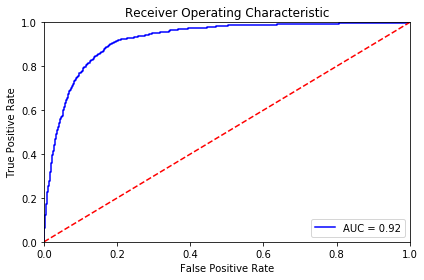

In [2167]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [2168]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y7_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y7_test, y_pred_adj))
    
    cm1 = confusion_matrix(y7_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2173]:
precision_recall_threshold(0.075)

Confusion Matrix: 

     pred_neg  pred_pos
neg      9082       946
pos       183       577

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10028
           1       0.38      0.76      0.51       760

    accuracy                           0.90     10788
   macro avg       0.68      0.83      0.72     10788
weighted avg       0.94      0.90      0.91     10788

Specificity :  0.9056641404068608
Sensitivity: 0.7592105263157894


In [1002]:
explainer = shap.TreeExplainer(xg_clf5)

In [1003]:
shap_values = explainer.shap_values(X7_train, approximate=True, tree_limit=100)

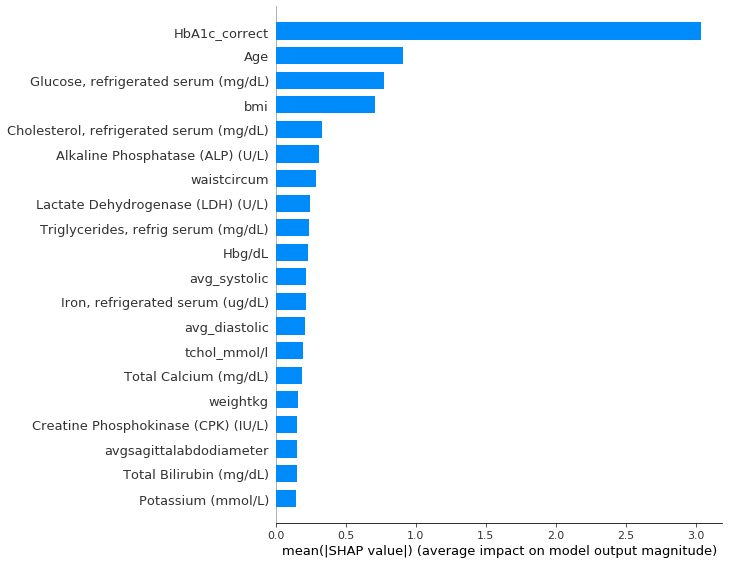

In [1004]:
shap.summary_plot(shap_values, X7_train, plot_type="bar")

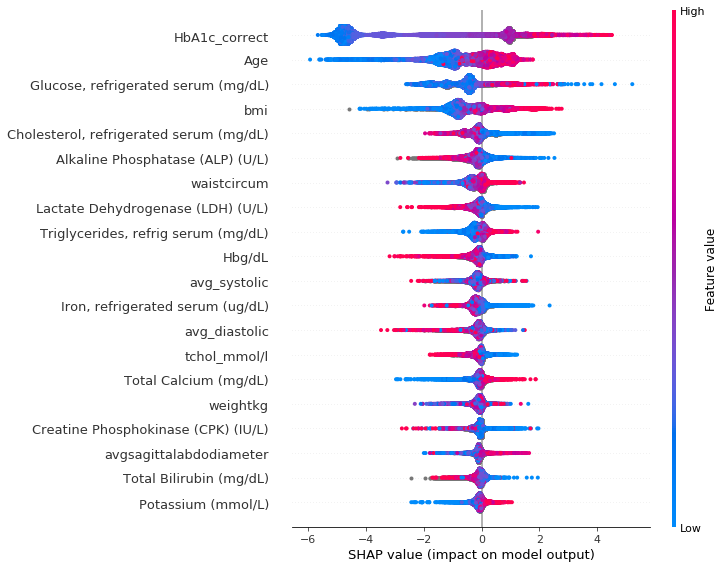

In [1005]:
shap.summary_plot(shap_values, X7_train)

This performed similar to the model predicting insulin, however has slightly better metrics - including better precision (38% Vs 29.13%) and sensitivity and specificity.

_____

## How does the model change if we only look at people who have or have risk factors for T2DM? 

In [2174]:
#import 
df8 = pd.read_csv('final_data.csv')

In [2175]:
#drop redundant 
df8.drop(columns = [
 'Known_T2DM', 
'Prescriptions',
 'hba1c_48',
 'hba1c_42',
 'insulin_prescribed'], axis=1, inplace=True)

In [2176]:
#restrict to metabolic_risk = 1
metabolic_risk_m = df8['metabolic_risk'] == 1
df8 = df8[metabolic_risk_m]

In [2177]:
df8.shape

(8159, 43)

In [2178]:
#target selection 
y8 = df8.pop('diabetic_medication')

In [2179]:
X8 = df8

In [2180]:
#split test train 
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, random_state=123)

In [1018]:
#learning rate 

a = [0.001, 0.01, 0.1]

#estimators

n_estimators = [100, 200, 300, 400, 500]

#subsample 

subsample = [0.5, 0.7, 1.0]

#max depth 
max_depth = list(range(1, 100, 10))

#scale_pos_weight 

scale_pos_weight = list(range(1,100,10))

#hyperparameter dictionary 

hyperparameters = dict(learning_rate = a, n_estimators = n_estimators, subsample = subsample,max_depth = max_depth, scale_pos_weight = scale_pos_weight)


In [151]:
xg_clf_optimisation = RandomizedSearchCV(xg_clf, hyperparameters, n_iter = 2, random_state = 123, cv=3, verbose=3)
    

In [152]:
# Fit randomized search
best_model = xg_clf_optimisation.fit(X8_train, y8_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 
[19:13:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=26
[19:13:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=26


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[19:13:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=26
[19:13:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=31
[19:13:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=31
[19:13:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=31
[19:13:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=29
[19:13:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=31
[19:13:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 0 pruned nodes, max_depth=31
[19:13:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=31
[19:13:40] INFO: src/tree/updater_prune.

[19:13:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=23
[19:13:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=14
[19:13:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=14
[19:13:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=17
[19:13:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=16
[19:13:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=23
[19:13:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=21
[19:13:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=23
[19:13:44] INFO: src/tree/updater_prune.

[19:13:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[19:13:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=15
[19:13:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=11
[19:13:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=12
[19:13:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=13
[19:13:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=11
[19:13:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=12
[19:13:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=12
[19:13:46] INFO: src/tree/updater_prune.

[19:13:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=10
[19:13:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=11
[19:13:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=8
[19:13:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[19:13:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=8
[19:13:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[19:13:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[19:13:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=9
[19:13:48] INFO: src/tree/updater_prune.cc:74: tree 

[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=8
[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=11
[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=8
[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=8
[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=8
[19:13:50] INFO: src/tree/updater_prune.cc:74: tree pru

[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=11
[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=8
[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=9
[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=8
[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[19:13:52] INFO: src/tree/updater_prune.cc:74: tree pru

[19:13:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=8
[19:13:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[19:13:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[19:13:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[19:13:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[19:13:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=8
[19:13:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[19:13:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=8
[19:13:54] INFO: src/tree/updater_prune.cc:74: tree prun

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.3s remaining:    0.0s


[19:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=31
[19:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=28
[19:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=31
[19:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=31
[19:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=31
[19:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 0 pruned nodes, max_depth=28
[19:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=31
[19:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=31
[19:13:55] INFO: src/tree/updater_prune.

[19:13:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=18
[19:13:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=15
[19:13:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 extra nodes, 0 pruned nodes, max_depth=15
[19:13:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=20
[19:13:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=14
[19:13:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=18
[19:13:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=23
[19:13:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=20
[19:13:59] INFO: src/tree/updater_prune.

[19:14:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=13
[19:14:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=11
[19:14:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=14
[19:14:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=13
[19:14:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=12
[19:14:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=11
[19:14:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=12
[19:14:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=14
[19:14:02] INFO: src/tree/updater_prune.

[19:14:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=11
[19:14:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[19:14:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=9
[19:14:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[19:14:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[19:14:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=8
[19:14:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[19:14:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=11
[19:14:04] INFO: src/tree/updater_prune.cc:74: tree

[19:14:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[19:14:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[19:14:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=8
[19:14:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[19:14:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[19:14:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[19:14:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=8
[19:14:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=10
[19:14:06] INFO: src/tree/updater_prune.cc:74: tree p

[19:14:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[19:14:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=9
[19:14:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[19:14:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[19:14:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[19:14:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=8
[19:14:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[19:14:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[19:14:07] INFO: src/tree/updater_prune.cc:74: tree prun

[19:14:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[19:14:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[19:14:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[19:14:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[19:14:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[19:14:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[19:14:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[19:14:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[19:14:09] INFO: src/tree/updater_prune.cc:74: tree prun

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.6s remaining:    0.0s


[19:14:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=26
[19:14:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=26
[19:14:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 288 extra nodes, 0 pruned nodes, max_depth=31
[19:14:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=25
[19:14:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=31
[19:14:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=31
[19:14:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=31
[19:14:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=31
[19:14:10] INFO: src/tree/updater_prune.

[19:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=19
[19:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=24
[19:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=18
[19:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=16
[19:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=17
[19:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=20
[19:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=16
[19:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=17
[19:14:14] INFO: src/tree/updater_prune.

[19:14:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=14
[19:14:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=15
[19:14:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=12
[19:14:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=14
[19:14:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=18
[19:14:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=13
[19:14:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=12
[19:14:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[19:14:17] INFO: src/tree/updater_prune.

[19:14:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=12
[19:14:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=8
[19:14:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=11
[19:14:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[19:14:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=10
[19:14:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[19:14:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=10
[19:14:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=11
[19:14:19] INFO: src/tree/updater_prune.cc:74: tre

[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=8
[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=8
[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=8
[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=8
[19:14:21] INFO: src/tree/updater_prune.cc:74: tree pru

[19:14:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[19:14:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=8
[19:14:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[19:14:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[19:14:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=9
[19:14:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=8
[19:14:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=8
[19:14:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[19:14:22] INFO: src/tree/updater_prune.cc:74: tree prun

[19:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=9
[19:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[19:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=9
[19:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[19:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=8
[19:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=8
[19:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[19:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[19:14:24] INFO: src/tree/updater_prune.cc:74: tree prun

[19:14:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=23
[19:14:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=27
[19:14:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=27
[19:14:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=22
[19:14:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=31
[19:14:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=23
[19:14:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=24
[19:14:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 0 pruned nodes, max_depth=28
[19:14:26] INFO: src/tree/updater_prune.

[19:14:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=11
[19:14:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=20
[19:14:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=15
[19:14:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=18
[19:14:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=15
[19:14:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=15
[19:14:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=14
[19:14:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=13
[19:14:29] INFO: src/tree/updater_prune.

[19:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=26
[19:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=14
[19:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=18
[19:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=15
[19:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=17
[19:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=17
[19:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 extra nodes, 0 pruned nodes, max_depth=13
[19:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 0 pruned nodes, max_depth=15
[19:14:33] INFO: src/tree/updater_prune.

[19:14:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=29
[19:14:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=30
[19:14:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=30
[19:14:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=31
[19:14:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=23
[19:14:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=24
[19:14:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=21
[19:14:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=25
[19:14:37] INFO: src/tree/updater_prune.

[19:14:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=15
[19:14:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=14
[19:14:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=11
[19:14:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=10
[19:14:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=12
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=14
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=11
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=13
[19:14:40] INFO: src/tree/updater_prune.

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min finished


[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 0 pruned nodes, max_depth=24
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 552 extra nodes, 0 pruned nodes, max_depth=30
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 580 extra nodes, 0 pruned nodes, max_depth=27
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 0 pruned nodes, max_depth=31
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 588 extra nodes, 0 pruned nodes, max_depth=29
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 616 extra nodes, 0 pruned nodes, max_depth=29
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 620 extra nodes, 0 pruned nodes, max_depth=26
[19:14:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 620 extra nodes, 0 pruned nodes, max_depth=28
[19:14:41] INFO: src/tree/updater_prune.

[19:14:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 0 pruned nodes, max_depth=18
[19:14:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=18
[19:14:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 0 pruned nodes, max_depth=18
[19:14:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=27
[19:14:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=16
[19:14:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=23
[19:14:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=13
[19:14:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 300 extra nodes, 0 pruned nodes, max_depth=18
[19:14:46] INFO: src/tree/updater_prune.

In [153]:
best_model.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 11,
 'n_estimators': 100,
 'max_depth': 31,
 'learning_rate': 0.1}

In [2182]:

xg_clf6 = xgb.XGBClassifier(subsample=0.7, scale_pos_weight = 11, n_estimators = 100, max_depth = 31, learning_rate = 0.1, random_state=123)

In [2183]:
xg_clf6.fit(X8_train, y8_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=31,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [2184]:
#score the model 
scores = cross_val_score(xg_clf6, X8_train, y8_train, cv=2, scoring='roc_auc')
print(f"average AUC: {np.mean(scores)}")

average AUC: 0.8405315337735324


In [2185]:
#get predictions and probabilities 
y_pred = cross_val_predict(xg_clf6, X8_test, y8_test, cv=5)
probs = cross_val_predict(xg_clf6, X8_test, y8_test, cv=5, method='predict_proba')
preds = probs[:,1]

In [2186]:
#create dataframe 
outcome = pd.DataFrame(y8_test)
outcome.columns = ['diabetes_medication_actual']
outcome['diabetes_medication_predicted'] = y_pred
outcome.head()

diabetes_medication_actual  diabetes_medication_predicted
6071                            1                              0
6020                            1                              1
27922                           0                              0
17632                           0                              0
22454                           0                              0

In [2187]:
fpr, tpr, threshold = metrics.roc_curve(outcome['diabetes_medication_actual'], preds)
roc_auc = metrics.auc(fpr, tpr)

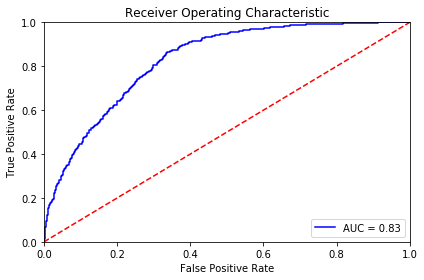

In [2192]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc6.png')

In [2189]:
#adjust threshold probabilities 
def adjusted_classes(y_true, t):

    return [1 if y > t else 0 for y in preds]

def precision_recall_threshold(t):
    
    y_pred_adj = adjusted_classes(preds, t)
    print('Confusion Matrix: \n')
    print(pd.DataFrame(confusion_matrix(y8_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    print('\nClassification Report: \n')
    print(classification_report(y8_test, y_pred_adj))
    
    cm1 = confusion_matrix(y8_test, y_pred_adj)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity )

    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity:', sensitivity)

In [2191]:
precision_recall_threshold(0.1)

Confusion Matrix: 

     pred_neg  pred_pos
neg      1038       548
pos        60       394

Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1586
           1       0.42      0.87      0.56       454

    accuracy                           0.70      2040
   macro avg       0.68      0.76      0.67      2040
weighted avg       0.83      0.70      0.73      2040

Specificity :  0.6544766708701135
Sensitivity: 0.8678414096916299


Similar to previous attempts, prediction improves when I restrict my model to just assessing medication use in patients who are likely to have diabetes. However, the false positive rate has increased significantly (approx 26% of population are false positives. 

_______

## Multi-label Classification 


There is numerous treatment options for diabetes and these are not mutually exclusive. As such, I can map a patient's treatment to several different targets simultaneously. 

For this task, I will employ a labelpowerset function which transforms a multi-label problem to a multi-class problem with 1 multi-class classifier trained on all unique label combinations found in the training data.


In [1036]:
df9 = pd.read_csv('final_data.csv')

In [1037]:
df9 = df9.drop(columns=[
'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
 'Known_T2DM', 
 'HbA1c_correct',
 'eGFR',
 'metabolic_risk', 
 'Prescriptions', 'hba1c_42', 'hba1c_48'], axis=1)

In [1038]:
y9 = df9[['insulin_prescribed', 'diabetic_medication']]

In [1039]:
#for multi-label classification - I must use a sparse matrix 
from scipy.sparse import csr_matrix
y9 = csr_matrix(y9)

In [1040]:
df9.drop(columns=['insulin_prescribed', 'diabetic_medication'], axis=1, inplace=True)

In [1041]:
X9 = df9

In [1042]:
X9 = csr_matrix(X9)

In [1043]:
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, random_state=123)

In [1044]:
from skmultilearn.problem_transform import LabelPowerset

In [1045]:
#randomisedsearchCV of two different models within the label powerset 

from sklearn.model_selection import RandomizedSearchCV
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier

parameters = [
    {
        'classifier': [xgb.XGBClassifier()],
        'classifier__alpha': [0.7, 1.0],
        'classifier__n_estimator': [100,200,300,400,500], 
        'classifier__scale_pos_weight': list(range(1,100,10)),
        'classifier__learning_rate': [0.001, 0.01, 0.1],
        'classifier__max_depth': list(range(1,100,10)),
        'classifier__subsample': [0.5, 0.7, 1.0]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimator': [100,200,300,400,500], 
        'classifier__max_depth': list(range(1,100,10)),
        'classifier__max_features': list(range(1,50,10))
    },
]


multi_label = RandomizedSearchCV(LabelPowerset(), parameters, n_iter=3, random_state=123, cv=2, verbose=2, scoring='accuracy')


In [214]:
multi_label.fit(X9_train, y9_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] classifier__subsample=0.5, classifier__scale_pos_weight=41, classifier__n_estimator=500, classifier__max_depth=31, classifier__learning_rate=0.1, classifier__alpha=0.7, classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__subsample=0.5, classifier__scale_pos_weight=41, classifier__n_estimator=500, classifier__max_depth=31, classifier__learning_rate=0.1, classifier__alpha=0.7, classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), total=  48.0s
[CV] classifier__subsample=0.5, classifier__scale_pos_weight=41, classifier__n_estimator=500, classifier__max_depth=31, classifier__learning_rate=0.1, classifier__alpha=0.7, classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
            

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.0s remaining:    0.0s


[CV]  classifier__subsample=0.5, classifier__scale_pos_weight=41, classifier__n_estimator=500, classifier__max_depth=31, classifier__learning_rate=0.1, classifier__alpha=0.7, classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), total=  50.0s
[CV] classifier__subsample=1.0, classifier__scale_pos_weight=81, classifier__n_estimator=500, classifier__max_depth=81, classifier__learning_rate=0.001, classifier__alpha=0.7, classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
          

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.2min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LabelPowerset(classifier=None,
                                           require_dense=[True, True]),
                   iid='deprecated', n_iter=3, n_jobs=None,
                   param_distributions=[{'classifier': [XGBClassifier(alpha=0.7,
                                                                      base_score=0.5,
                                                                      booster='gbtree',
                                                                      colsample_bylevel=1,
                                                                      colsample_bynode=1,
                                                                      colsample_bytree=1,
                                                                      gamma=0,
                                                                      learning_rate=0.1,
                                                                      ma

In [1053]:
#find the best model and the best parameters
multi_label.get_params

<bound method MLClassifierBase.get_params of LabelPowerset(classifier=XGBClassifier(alpha=0.7, base_score=0.5,
                                       booster='gbtree', colsample_bylevel=1,
                                       colsample_bynode=1, colsample_bytree=1,
                                       gamma=0, learning_rate=0.1,
                                       max_delta_step=0, max_depth=31,
                                       min_child_weight=1, missing=None,
                                       n_estimator=500, n_estimators=500,
                                       n_jobs=1, nthread=None,
                                       objective='multi:softprob',
                                       random_state=0, reg_alpha=0,
                                       reg_lambda=1, scale_pos_weight=41,
                                       seed=None, silent=None, subsample=0.5,
                                       verbosity=1),
              require_dense=[True, True])>

In [1055]:
#change the paramters of the model 
xg_clf = xgb.XGBClassifier(alpha=0.7, base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=31,
               min_child_weight=1, missing=None, n_estimator=500,
               n_estimators=500, n_jobs=1, nthread=None,
               objective='binary:logistic', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=41, seed=None, silent=None,
               subsample=0.5, verbosity=2)

In [1056]:
#instantiate the model
multi_label = LabelPowerset(xg_clf)

In [1057]:
#train the optimised model 
multi_label.fit(X9_train, y9_train)

[20:40:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1004 extra nodes, 0 pruned nodes, max_depth=20
[20:40:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 0 pruned nodes, max_depth=23
[20:40:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=17
[20:40:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=15
[20:40:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1094 extra nodes, 0 pruned nodes, max_depth=24
[20:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes, 0 pruned nodes, max_depth=23
[20:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=21
[20:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=12
[20:40:47] INFO: src/tree/updater_prun

[20:41:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1174 extra nodes, 0 pruned nodes, max_depth=30
[20:41:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=17
[20:41:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=18
[20:41:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1016 extra nodes, 0 pruned nodes, max_depth=20
[20:41:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1174 extra nodes, 0 pruned nodes, max_depth=22
[20:41:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=16
[20:41:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=16
[20:41:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 974 extra nodes, 0 pruned nodes, max_depth=20
[20:41:09] INFO: src/tree/updater_pru

[20:41:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=16
[20:41:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=14
[20:41:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=23
[20:41:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1066 extra nodes, 0 pruned nodes, max_depth=23
[20:41:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=13
[20:41:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=14
[20:41:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=26
[20:41:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1092 extra nodes, 0 pruned nodes, max_depth=24
[20:41:31] INFO: src/tree/updater_prun

[20:41:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 0 pruned nodes, max_depth=21
[20:41:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes, 0 pruned nodes, max_depth=24
[20:41:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=16
[20:41:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=14
[20:41:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 672 extra nodes, 0 pruned nodes, max_depth=27
[20:41:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 0 pruned nodes, max_depth=31
[20:41:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=13
[20:41:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=15
[20:41:52] INFO: src/tree/updater_prune.

[20:42:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 680 extra nodes, 0 pruned nodes, max_depth=31
[20:42:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=17
[20:42:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=17
[20:42:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 0 pruned nodes, max_depth=30
[20:42:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 672 extra nodes, 0 pruned nodes, max_depth=30
[20:42:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=13
[20:42:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=15
[20:42:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=16
[20:42:12] INFO: src/tree/updater_prune.

[20:42:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=13
[20:42:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=18
[20:42:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 534 extra nodes, 0 pruned nodes, max_depth=24
[20:42:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=16
[20:42:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=14
[20:42:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=22
[20:42:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 0 pruned nodes, max_depth=24
[20:42:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=15
[20:42:32] INFO: src/tree/updater_prune.

[20:42:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=21
[20:42:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=18
[20:42:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=13
[20:42:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=15
[20:42:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=17
[20:42:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=26
[20:42:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=13
[20:42:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=12
[20:42:51] INFO: src/tree/updater_prune.c

[20:43:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=20
[20:43:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=12
[20:43:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=13
[20:43:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 0 pruned nodes, max_depth=24
[20:43:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=19
[20:43:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=15
[20:43:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=11
[20:43:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 0 pruned nodes, max_depth=19
[20:43:09] INFO: src/tree/updater_prune.cc

[20:43:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=12
[20:43:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=19
[20:43:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=24
[20:43:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=14
[20:43:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=10
[20:43:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=18
[20:43:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=16
[20:43:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=12
[20:43:27] INFO: src/tree/updater_prune.cc:7

[20:43:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=16
[20:43:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=16
[20:43:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=13
[20:43:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[20:43:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=19
[20:43:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 290 extra nodes, 0 pruned nodes, max_depth=21
[20:43:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[20:43:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=10
[20:43:44] INFO: src/tree/updater_prune.cc:74

[20:43:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=16
[20:43:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=12
[20:43:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[20:43:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=15
[20:43:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=19
[20:43:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:43:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[20:43:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=15
[20:43:59] INFO: src/tree/updater_prune.cc:74:

[20:44:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[20:44:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=15
[20:44:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=14
[20:44:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[20:44:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=14
[20:44:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=13
[20:44:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=16
[20:44:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=8
[20:44:14] INFO: src/tree/updater_prune.cc:74: 

[20:44:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=14
[20:44:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=16
[20:44:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[20:44:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=11
[20:44:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=12
[20:44:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=19
[20:44:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[20:44:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=8
[20:44:29] INFO: src/tree/updater_prune.cc:74: 

[20:44:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=13
[20:44:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=11
[20:44:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=8
[20:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=15
[20:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=13
[20:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[20:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[20:44:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=18
[20:44:44] INFO: src/tree/updater_prune.cc:74: 

[20:44:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[20:44:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[20:44:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=17
[20:44:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=22
[20:44:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=10
[20:44:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=8
[20:44:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=16
[20:44:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=14
[20:44:58] INFO: src/tree/updater_prune.cc:74: 

[20:45:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[20:45:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=15
[20:45:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=12
[20:45:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[20:45:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[20:45:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=14
[20:45:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=11
[20:45:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=8
[20:45:11] INFO: src/tree/updater_prune.cc:74: t

[20:45:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=14
[20:45:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=11
[20:45:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[20:45:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=10
[20:45:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=16
[20:45:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=12
[20:45:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=8
[20:45:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:45:25] INFO: src/tree/updater_prune.cc:74: 

[20:45:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=15
[20:45:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=8
[20:45:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[20:45:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=15
[20:45:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=17
[20:45:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[20:45:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[20:45:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=11
[20:45:38] INFO: src/tree/updater_prune.cc:74: 

[20:45:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[20:45:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[20:45:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=12
[20:45:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[20:45:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[20:45:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=9
[20:45:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=13
[20:45:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=16
[20:45:50] INFO: src/tree/updater_prune.cc:74: t

[20:46:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[20:46:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=13
[20:46:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=15
[20:46:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[20:46:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[20:46:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=18
[20:46:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=10
[20:46:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:46:03] INFO: src/tree/updater_prune.cc:74: 

[20:46:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=12
[20:46:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=14
[20:46:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=8
[20:46:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[20:46:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[20:46:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=12
[20:46:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=9
[20:46:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[20:46:15] INFO: src/tree/updater_prune.cc:74: t

[20:46:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[20:46:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:46:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=14
[20:46:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=10
[20:46:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=8
[20:46:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[20:46:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=14
[20:46:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=12
[20:46:27] INFO: src/tree/updater_prune.cc:74: t

[20:46:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=9
[20:46:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[20:46:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[20:46:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20:46:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=11
[20:46:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=17
[20:46:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:46:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:46:39] INFO: src/tree/updater_prune.cc:74: tree

[20:46:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=8
[20:46:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[20:46:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=10
[20:46:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=13
[20:46:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[20:46:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[20:46:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=14
[20:46:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=13
[20:46:51] INFO: src/tree/updater_prune.cc:74: tree

[20:47:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=10
[20:47:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=13
[20:47:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20:47:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[20:47:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=11
[20:47:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=11
[20:47:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:47:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[20:47:02] INFO: src/tree/updater_prune.cc:74: tre

[20:47:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[20:47:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=11
[20:47:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=10
[20:47:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[20:47:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[20:47:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=11
[20:47:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=15
[20:47:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[20:47:14] INFO: src/tree/updater_prune.cc:74: tree 

[20:47:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[20:47:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20:47:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=13
[20:47:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=10
[20:47:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[20:47:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:47:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[20:47:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=13
[20:47:25] INFO: src/tree/updater_prune.cc:74: tree p

[20:47:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:47:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=13
[20:47:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20:47:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:47:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=13
[20:47:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=12
[20:47:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[20:47:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[20:47:36] INFO: src/tree/updater_prune.cc:74: tree 

[20:47:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[20:47:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[20:47:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=11
[20:47:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=9
[20:47:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[20:47:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20:47:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=11
[20:47:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=12
[20:47:47] INFO: src/tree/updater_prune.cc:74: tree p

LabelPowerset(classifier=XGBClassifier(alpha=0.7, base_score=0.5,
                                       booster='gbtree', colsample_bylevel=1,
                                       colsample_bynode=1, colsample_bytree=1,
                                       gamma=0, learning_rate=0.1,
                                       max_delta_step=0, max_depth=31,
                                       min_child_weight=1, missing=None,
                                       n_estimator=500, n_estimators=500,
                                       n_jobs=1, nthread=None,
                                       objective='multi:softprob',
                                       random_state=0, reg_alpha=0,
                                       reg_lambda=1, scale_pos_weight=41,
                                       seed=None, silent=None, subsample=0.5,
                                       verbosity=2),
              require_dense=[True, True])

In [1058]:
#get predictions for test set 
predictions = multi_label.predict(X9_test)

In [1059]:
#convert sparse matrix to dataframe 
predictions = pd.DataFrame(predictions.toarray())

In [1060]:
#rename columns 
predictions.columns=['diabetic_med_predicted', 'insulin_predicted']

In [1061]:
#find the probability of each prediction in the test set 
probs = multi_label.predict_proba(X9_test)

In [1062]:
#convert sparse matrix to a dataframe 
probs = pd.DataFrame(probs.toarray())

In [1063]:
#merge probabilities and predictions together 
probs = pd.concat([probs, predictions], axis=1)

In [1064]:
#convert actual y_test to pandas dataframe 
actual = pd.DataFrame(y9_test.toarray())

In [1065]:
#rename columns 
actual.columns = ['diabetic_med_true', 'insulin_true']

In [1066]:
#merge 
outcome = pd.concat([probs, actual], axis=1)

In [1067]:
#rename columns 
outcome.columns = ['probs_diabetic_med', 'probs_insulin', 'diabetic_med_predicted', 'insulin_predicted', 'diabetic_med_true', 'insulin_med_true']

In [1068]:
#adjust the thresholds 

def adjusted_diabetic_med(row): 
    if row['probs_diabetic_med'] >= 0.1: 
        return(1)
    else:
        return(0)
    
def adjusted_insulin(row): 
    if row['probs_insulin'] >= 0.15: 
        return(1)
    else:
        return(0)
    
#crete new columns with adjusted predictions 

outcome['adjusted_diabetic_med_prediction'] = outcome.apply(adjusted_diabetic_med, axis=1)
outcome['adjusted_insulin_prediction'] = outcome.apply(adjusted_insulin, axis=1)

In [1069]:
outcome.head()

probs_diabetic_med  probs_insulin  diabetic_med_predicted  \
0            0.000006       0.000012                       0   
1            0.000002       0.000029                       0   
2            0.072542       0.540587                       0   
3            0.000342       0.013891                       0   
4            0.004971       0.801647                       0   

   insulin_predicted  diabetic_med_true  insulin_med_true  \
0                  0                  0                 0   
1                  0                  0                 0   
2                  1                  0                 1   
3                  0                  0                 0   
4                  1                  0                 1   

   adjusted_diabetic_med_prediction  adjusted_insulin_prediction  
0                                 0                            0  
1                                 0                            0  
2                                 0                            1  
3                                 0                            0  
4                                 0                            1

## Evaluation of multi-label classification

#### Hamming loss 

Hamming-Loss is the fraction of labels that are incorrectly predicted out of the total of all labels. 

#### Jaccard similarity score

is the size of the intersection of the predicted labels and the true labels divided by the size of the union of the predicted and true labels. It ranges from 0 to 1, and 1 is the perfect score.



In [1071]:
#hamming loss
from sklearn.metrics import hamming_loss
y_pred = outcome[['diabetic_med_true', 'insulin_med_true']]
y_true = outcome[['adjusted_diabetic_med_prediction', 'adjusted_insulin_prediction']]
hamming_loss(y_true, y_pred)

0.049777530589543935

In [1082]:
#Jaccard Similarity
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_pred, y_true)

0.9219039673711531

#### Confusion Matrix 

I am converting this to a multi-class classification format to create a confusion matrix 

Using adjusted predictions 

There are 4 possible treatment options: 
- No treatment (AKA dietary therapy) 
- Anti-diabetic agent monotherapy 
- Insulin monotherapy 
- Anti-diabetic agent and insulin 

In [1086]:
def actual_treatment(row): 
    if ((row['insulin_med_true'] == 0) & (row['diabetic_med_true'] == 0)): 
        return(0)
    elif ((row['insulin_med_true'] == 0) & (row['diabetic_med_true'] == 1)): 
        return(1)
    elif ((row['insulin_med_true'] == 1) & (row['diabetic_med_true'] == 0)): 
        return(2)
    elif ((row['insulin_med_true'] == 1) & (row['diabetic_med_true'] == 1)): 
        return(3)
    
def predicted_treatment(row): 
    if ((row['adjusted_insulin_prediction'] == 0) & (row['adjusted_diabetic_med_prediction'] == 0)): 
        return(0)
    elif ((row['adjusted_insulin_prediction'] == 0) & (row['adjusted_diabetic_med_prediction'] == 1)): 
        return(1)
    elif ((row['adjusted_insulin_prediction'] == 1) & (row['adjusted_diabetic_med_prediction'] == 0)): 
        return(2)
    elif ((row['adjusted_insulin_prediction'] == 1) & (row['adjusted_diabetic_med_prediction'] == 1)): 
        return(3)

In [1087]:
outcome['actual_treatment'] = outcome.apply(actual_treatment, axis=1)

In [1088]:
outcome['predicted_treatment'] = outcome.apply(predicted_treatment, axis=1)

In [1089]:
from mlxtend.evaluate import confusion_matrix


cm = pd.DataFrame((confusion_matrix(outcome['actual_treatment'], outcome['predicted_treatment'], binary=False)), 
                   columns=['pred_no_treatment', 'pred_tablet', 'pred_insulin', 'pred_tablet_insulin'],
                   index=['actual_no_treatment', 'actual_tablet', 'actual_insulin', 'actual_tablet_insulin'])
cm

pred_no_treatment  pred_tablet  pred_insulin  \
actual_no_treatment                 9572           20           199   
actual_tablet                         59           30            37   
actual_insulin                       333           20           224   
actual_tablet_insulin                 38            6            31   

                       pred_tablet_insulin  
actual_no_treatment                     51  
actual_tablet                           60  
actual_insulin                          74  
actual_tablet_insulin                   34

In [1090]:
print(classification_report(outcome['actual_treatment'], outcome['predicted_treatment']))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      9842
           1       0.39      0.16      0.23       186
           2       0.46      0.34      0.39       651
           3       0.16      0.31      0.21       109

    accuracy                           0.91     10788
   macro avg       0.49      0.45      0.45     10788
weighted avg       0.91      0.91      0.91     10788



In summary, this model does not perform well. It has a good ability to detect people who do not need treatment. However, it is not accurate at detecting who should be prescribed anti-diabetic medication. Interesting the metrics to evaluate the multi-label classifer (Jaccard similarity and Hamming loss function) suggest the model performs well, but this is likely due to the large class imbalance. 

Furthermore, even on a simpler task (such as the prediction of insulin) it performs much worse than a single binary classifier.

There are a number of reasons this model may have failed: 
- Poor consistency among clinicians in the prescribing of oral anti-diabetic agents. This can be quite a vague and challenging decision to make and is likely to be confounded by many unmeasured variables such as allergies, attitude to medication, side-effect, financial status and individual clinician preference. Whereas, the decision to start insulin is more black-and-white as it is usually required when diabetic control is poor.
- Smaller numbers of patients on insulin and on insulin-tablet combined therapy. 
- Unclear what probability threhsolds should be set for each class. Domain knowledge has been the chosen method to set probability threhsolds in this project - however, this is much more challening for multi-label classification and it is not clear whether these are the optimal thresholds. 

_______

## Multi-Class Classification 

I am now converting the treatment to a multi-class classification problem. 

Target: 
Treatment (no treatment, oral agents, insulin monotherapy or combined insulin-tablet therapy). 

Features: 
All laboratory metrics, measurements and demographic features 

Model: XGBoost multi-class classifier 

In [1241]:
#read in the dataset 
df11 = pd.read_csv('final_data.csv')

In [1242]:
#drop redundant 
df11 = df11.drop(columns=[
 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
 'Known_T2DM', 
 'HbA1c_correct',
 'eGFR',
 'metabolic_risk', 
 'Prescriptions', 'hba1c_42', 'hba1c_48'], axis=1)

In [1243]:
#new target selection - treatment categories

def actual_treatment(row): 
    if ((row['insulin_prescribed'] == 0) & (row['diabetic_medication'] == 0)): 
        return(0)
    elif ((row['insulin_prescribed'] == 0) & (row['diabetic_medication'] == 1)): 
        return(1)
    elif ((row['insulin_prescribed'] == 1) & (row['diabetic_medication'] == 0)): 
        return(2)
    elif ((row['insulin_prescribed'] == 1) & (row['diabetic_medication'] == 1)): 
        return(3)

In [1244]:
#apply function 
df11['actual_treatment'] =df11.apply(actual_treatment, axis=1) 

In [1245]:
#explore how many people are being treated by what regieme
df11['actual_treatment'].value_counts()

0    39360
1     2659
2      676
3      455
Name: actual_treatment, dtype: int64

This shows us that: 
    
|Treatment|Number of participants| Percentage  |
|--|-------------------------------|-----|
|No treatment |39,360|91.21%|
|Oral anti-diabetic agent monotherapy|2,659|6.16%|
|Insulin monotherapy | 676 |1.57%|
|Oral agent and insulin | 455 | 1.05% |

**Table:** Details of the number of participants receiving different treatment modalities

In [1246]:
#drop redundant columns 
df11.drop(columns=['insulin_prescribed', 'diabetic_medication'], axis=1, inplace=True)

In [1247]:
#target selection 
y11 = df11.pop('actual_treatment')

In [1248]:
X11=df11

In [1249]:
#split test-train 
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, random_state=123)

In [1251]:
#instantiate 
xg_clf7 =xgb.XGBClassifier(objective = 'multi:softprob')

In [1113]:
#learning rate 

a = [0.001, 0.01, 0.1]

#estimators

n_estimators = [100, 200, 300, 400, 500]

#subsample 

subsample = [0.5, 0.7, 1.0]

#max depth 
max_depth = list(range(1, 100, 10))

#scale_pos_weight 

scale_pos_weight = list(range(1,100,10))

#hyperparameter dictionary 

hyperparameters = dict(learning_rate = a, n_estimators = n_estimators, subsample = subsample,max_depth = max_depth, scale_pos_weight = scale_pos_weight)


In [1114]:
xg_clf_optimisation = RandomizedSearchCV(xg_clf7, hyperparameters, n_iter = 2, random_state = 123, cv=3, verbose=3)
    

In [1115]:
best_model = xg_clf_optimisation.fit(X11_train, y11_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, score=1.000, total= 1.0min
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, score=1.000, total= 1.0min
[CV] subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV]  subsample=0.5, scale_pos_weight=41, n_estimators=500, max_depth=31, learning_rate=0.1, score=1.000, total= 1.0min
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, score=1.000, total=  16.5s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, score=1.000, total=  15.3s
[CV] subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1 
[CV]  subsample=0.7, scale_pos_weight=11, n_estimators=100, max_depth=31, learning_rate=0.1, score=1.000, total=  15.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.9min finished


In [1116]:
best_model.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 41,
 'n_estimators': 500,
 'max_depth': 31,
 'learning_rate': 0.1}

In [1256]:
xg_clf7 = xgb.XGBClassifier(objective = 'multi:softprob',
    subsample = 0.5, 
    n_estimators = 500, 
    scale_pos_weight=41, 
    max_depth=31, 
    learning_rate=0.1, 
    verbosity=3)

In [1257]:
xg_clf7.fit(X11_train, y11_train)

[22:10:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 666 extra nodes, 0 pruned nodes, max_depth=22
[22:10:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1104 extra nodes, 0 pruned nodes, max_depth=28
[22:10:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=17
[22:10:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=15
[22:10:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 0 pruned nodes, max_depth=20
[22:10:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1014 extra nodes, 0 pruned nodes, max_depth=22
[22:10:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=17
[22:10:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=15
[22:10:17] INFO: src/tree/updater_prun

[22:10:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1068 extra nodes, 0 pruned nodes, max_depth=21
[22:10:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=17
[22:10:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=17
[22:10:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1242 extra nodes, 0 pruned nodes, max_depth=23
[22:10:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1036 extra nodes, 0 pruned nodes, max_depth=22
[22:10:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=20
[22:10:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=16
[22:10:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1208 extra nodes, 0 pruned nodes, max_depth=25
[22:10:44] INFO: src/tree/updater_pr

[22:11:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=14
[22:11:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=13
[22:11:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1072 extra nodes, 0 pruned nodes, max_depth=19
[22:11:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 850 extra nodes, 0 pruned nodes, max_depth=31
[22:11:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=19
[22:11:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=14
[22:11:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1066 extra nodes, 0 pruned nodes, max_depth=20
[22:11:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=24
[22:11:14] INFO: src/tree/updater_prun

[22:11:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=14
[22:11:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 0 pruned nodes, max_depth=31
[22:11:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 714 extra nodes, 0 pruned nodes, max_depth=24
[22:11:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=14
[22:11:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=14
[22:11:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 0 pruned nodes, max_depth=24
[22:11:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 680 extra nodes, 0 pruned nodes, max_depth=25
[22:11:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=15
[22:11:42] INFO: src/tree/updater_prune.

[22:12:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 660 extra nodes, 0 pruned nodes, max_depth=21
[22:12:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 522 extra nodes, 0 pruned nodes, max_depth=23
[22:12:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=18
[22:12:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=21
[22:12:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 658 extra nodes, 0 pruned nodes, max_depth=25
[22:12:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 524 extra nodes, 0 pruned nodes, max_depth=19
[22:12:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=12
[22:12:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=17
[22:12:10] INFO: src/tree/updater_prune.

[22:12:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=20
[22:12:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=13
[22:12:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=13
[22:12:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 0 pruned nodes, max_depth=29
[22:12:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=16
[22:12:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=15
[22:12:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=18
[22:12:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 0 pruned nodes, max_depth=19
[22:12:37] INFO: src/tree/updater_prune.

[22:13:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[22:13:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=11
[22:13:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=21
[22:13:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=20
[22:13:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=16
[22:13:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=16
[22:13:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=20
[22:13:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=19
[22:13:03] INFO: src/tree/updater_prune.c

[22:13:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=11
[22:13:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=21
[22:13:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=18
[22:13:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[22:13:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[22:13:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=20
[22:13:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=21
[22:13:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=14
[22:13:28] INFO: src/tree/updater_prune.cc

[22:13:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=16
[22:13:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 0 pruned nodes, max_depth=18
[22:13:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=15
[22:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=10
[22:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=22
[22:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=17
[22:13:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=10
[22:13:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=10
[22:13:51] INFO: src/tree/updater_prune.cc:7

[22:14:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=15
[22:14:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=14
[22:14:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=10
[22:14:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 0 pruned nodes, max_depth=16
[22:14:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=19
[22:14:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=14
[22:14:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=9
[22:14:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=17
[22:14:14] INFO: src/tree/updater_prune.cc:74

[22:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[22:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[22:14:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=15
[22:14:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=16
[22:14:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=10
[22:14:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[22:14:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=18
[22:14:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=18
[22:14:35] INFO: src/tree/updater_prune.cc:74: 

[22:14:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=17
[22:14:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=11
[22:14:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=11
[22:14:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=11
[22:14:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=17
[22:14:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=14
[22:14:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[22:14:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=11
[22:14:56] INFO: src/tree/updater_prune.cc:74

[22:15:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=15
[22:15:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[22:15:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[22:15:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=20
[22:15:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=14
[22:15:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[22:15:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=8
[22:15:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=16
[22:15:19] INFO: src/tree/updater_prune.cc:74: 

[22:15:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=10
[22:15:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[22:15:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=14
[22:15:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=12
[22:15:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[22:15:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[22:15:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=18
[22:15:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=12
[22:15:39] INFO: src/tree/updater_prune.cc:74:

[22:15:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[22:15:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=18
[22:15:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=15
[22:15:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[22:15:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[22:15:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=16
[22:15:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=14
[22:15:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[22:15:59] INFO: src/tree/updater_prune.cc:74:

[22:16:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=12
[22:16:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=13
[22:16:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[22:16:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=8
[22:16:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=12
[22:16:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=14
[22:16:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[22:16:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=8
[22:16:18] INFO: src/tree/updater_prune.cc:74: t

[22:16:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=17
[22:16:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=10
[22:16:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[22:16:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=16
[22:16:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=13
[22:16:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[22:16:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[22:16:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=15
[22:16:36] INFO: src/tree/updater_prune.cc:74:

[22:16:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=8
[22:16:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=14
[22:16:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=14
[22:16:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[22:16:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[22:16:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=10
[22:16:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=13
[22:16:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[22:16:55] INFO: src/tree/updater_prune.cc:74: 

[22:17:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=16
[22:17:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=17
[22:17:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[22:17:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=8
[22:17:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=12
[22:17:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=12
[22:17:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[22:17:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[22:17:13] INFO: src/tree/updater_prune.cc:74: 

[22:17:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=12
[22:17:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=8
[22:17:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[22:17:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[22:17:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=13
[22:17:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[22:17:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[22:17:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=10
[22:17:31] INFO: src/tree/updater_prune.cc:74: 

[22:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=9
[22:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[22:17:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=13
[22:17:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=9
[22:17:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[22:17:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[22:17:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=15
[22:17:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=12
[22:17:48] INFO: src/tree/updater_prune.cc:74: tr

[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=12
[22:18:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=12
[22:18:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[22:18:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[22:18:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=12
[22:18:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=12
[22:18:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=9
[22:18:11] INFO: src/tree/updater_prune.cc:74: tr

[22:18:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=11
[22:18:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=12
[22:18:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[22:18:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[22:18:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=11
[22:18:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=14
[22:18:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=9
[22:18:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[22:18:35] INFO: src/tree/updater_prune.cc:74: tre

[22:18:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[22:18:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[22:18:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=11
[22:18:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=12
[22:18:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[22:18:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[22:18:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[22:18:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=12
[22:18:55] INFO: src/tree/updater_prune.cc:74: tre

[22:19:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[22:19:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=10
[22:19:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=9
[22:19:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[22:19:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=11
[22:19:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=11
[22:19:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[22:19:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[22:19:23] INFO: src/tree/updater_prune.cc:74: tre

[22:19:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=8
[22:19:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[22:19:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=15
[22:19:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[22:19:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[22:19:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[22:19:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=11
[22:19:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[22:19:54] INFO: src/tree/updater_prune.cc:74: tree p

[22:20:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=13
[22:20:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[22:20:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[22:20:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[22:20:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=11
[22:20:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=12
[22:20:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=8
[22:20:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[22:20:23] INFO: src/tree/updater_prune.cc:74: tree

[22:20:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[22:20:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[22:20:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=12
[22:20:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=12
[22:20:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[22:20:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[22:20:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=12
[22:20:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=12
[22:20:52] INFO: src/tree/updater_prune.cc:74: tree 

[22:21:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=9
[22:21:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=13
[22:21:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=8
[22:21:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[22:21:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=13
[22:21:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=13
[22:21:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[22:21:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[22:21:22] INFO: src/tree/updater_prune.cc:74: tree p

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=31,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=41, seed=None,
              silent=None, subsample=0.5, verbosity=3)

In [1294]:
#predictions
predictions = xg_clf7.predict(X11_test)

In [1295]:
#create predictions as a new dataframe 
outcome = pd.DataFrame(predictions)

In [1296]:
#predicted treatments before adjustments 
outcome[0].value_counts()

0    10397
1      316
2       63
3       12
Name: 0, dtype: int64

In [1297]:
#prediction probabilities 
probabilities = pd.DataFrame(xg_clf7.predict_proba(X11_test))

In [1298]:
#combine outcome and probabilites
outcome = pd.concat([outcome, probabilities], axis=1)


In [1299]:
#actual result
actual = pd.DataFrame(y11_test)

In [1300]:
#create df with actual and predicted results and probabilities  
outcome = pd.concat([actual.reset_index(), outcome.reset_index()],axis=1)

In [1301]:
#rename columns 
outcome = outcome[['actual_treatment', 0, 1, 2, 3]]

In [1302]:
#select relevant columns 
outcome.columns = ['actual', 'prediction', 'prob_0', 'prob_1', 'prob_2', 'prob_3']

In [1303]:
#actual treatments 
outcome['actual'].value_counts()

0    9842
1     651
2     186
3     109
Name: actual, dtype: int64

In [1304]:
outcome.head()

actual  prediction    prob_0    prob_1    prob_2        prob_3
0       0           0  0.999973  0.000019  0.000005  2.093607e-06
1       0           0  0.999981  0.000017  0.000002  2.336356e-07
2       1           0  0.603781  0.359265  0.020406  1.654807e-02
3       0           0  0.995697  0.004126  0.000139  3.876582e-05
4       1           1  0.374964  0.620328  0.001237  3.471141e-03

In [1305]:
#adjust probability 
def adjustments(row): 
    
    if row['prob_3'] > 0.10: 
        return(3)
    elif row['prob_2'] > 0.15: 
        return(2)
    elif row['prob_1'] > 0.2:
        return(1)
    else: 
        return(0)

In [1306]:
#adjust prediction depending on probabilities 
outcome['adjustments']= outcome.apply(adjustments, axis=1)

In [1307]:
outcome['adjustments'].value_counts()

0    10110
1      446
2      121
3      111
Name: adjustments, dtype: int64

In [1308]:
#create a df with actual results 
actual = pd.DataFrame(y11_test)

In [1309]:
results = pd.concat([outcome.reset_index(), actual.reset_index()], axis=1)

In [1312]:
results = results[['actual', 'adjustments']]

In [1315]:
results.head()

actual  adjustments
0       0            0
1       0            0
2       1            1
3       0            0
4       1            1

## Evaluation Metrics 

In [1320]:

cm = pd.DataFrame((confusion_matrix(results['adjustments'], results['actual'], binary=False)), 
                   columns=['pred_no_treatment', 'pred_tablet', 'pred_insulin', 'pred_tablet_insulin'],
                   index=['actual_no_treatment', 'actual_tablet', 'actual_insulin', 'actual_tablet_insulin'])

cm

pred_no_treatment  pred_tablet  pred_insulin  \
actual_no_treatment                 9619          375            71   
actual_tablet                        165          211            39   
actual_insulin                        29           30            49   
actual_tablet_insulin                 29           35            27   

                       pred_tablet_insulin  
actual_no_treatment                     45  
actual_tablet                           31  
actual_insulin                          13  
actual_tablet_insulin                   20

In [1321]:
print(classification_report(results['adjustments'], results['actual']))



              precision    recall  f1-score   support

           0       0.98      0.95      0.96     10110
           1       0.32      0.47      0.38       446
           2       0.26      0.40      0.32       121
           3       0.18      0.18      0.18       111

    accuracy                           0.92     10788
   macro avg       0.44      0.50      0.46     10788
weighted avg       0.93      0.92      0.92     10788



In [1322]:
from sklearn.metrics import precision_score
precision_score(results['actual'], results['adjustments'], average=None)

array([0.95143422, 0.47309417, 0.40495868, 0.18018018])

In [1323]:
jaccard_similarity_score(results['actual'], results['adjustments'])

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.


0.9175936225435669

In [1324]:
hamming_loss(results['actual'], results['adjustments'])

0.08240637745643307

This approach is slightly worse compared to multi-label classification. 

Multi-label may perform better as it takes into account the reltionship between labels and learns the correlations between labels. In contrast, multi-classification, the different classes are independent of each other. 

_____

## Limitations:


- Feature importance studies suggest that these models are over-reliant on one feature - a metric of glucose was needed to provide a suitable level of accuracy that would be needed for implementation in a real-world clinical setting. 


- The glucose measurement used in this dataset was a random blood glucose tested in a laboratory. It would be interesting to assess whether these models perform with other measurements of glucose such as a finger-prick bedside test. 


- This population is a representative, cross-sectional selection of US population. Glucose and other laboratory results are likely to be very different in other clinical settings (such as hospitals). These models may not extrapolate to other populations - for example, to sick patients in other setting.  


- Assumption that patients who were prescribed certain treatment are adherent to recognised, evidence based treatment algorithims. I am judging whether a patient needs a treatment for their diabetes based on a cohort of their peers rather than against an evidence-based standard of care. But as a clinical prompt, this may still be appropriate. It might provide a hint that among a representative cohort, we found that a patient's lab results would be in keeping with the characteristics and demographics of peers who required a certain treatment (insulin/anti-diabetic agent).  


- Furthermore, it is possible for model 2 where I predict what treatment a patient is on may not be accurate because the actual ground truth may not be accurate. For example, different clinicians could have very different approaches to starting metformin or unmeasured factors (such as patient preference, allergies or ability to take medication) may be confounding model. It is also possible that false negatives and positives may not be accurate as the model might be detecting patients who should in fact be on insulin but who are not because, for example, they may not actually want insulin or are not known to a diabetes team. Therefore, this model could be identifying participants in this dataset who would indeed benefit from insulin or medication. Interestingly, this model had much better ability to detct who was prescribed insulin compared to metformin. This could be due to the decision to start insulin being much more serious than starting an oral medicaiton. Therefore, the likelihood that a person who required insulin actually being prescribed insulin is probably higher. In contrast, the decision to start metformin may be inconsistent. As a result, it is not surprising that predicting insulin is easier than predicting metformin and other anti-diabetic medication use.   


- For a system that promotes saftey, false negative rate needs to be very low. In the above prototype, the best false negative rate was approx 1%. The sensitivity and specificity of these models are likely to be similar to other tests used in clinical medicine and we also need to compare the false-negative rate with human-error. 


- Temporality - the present study does not explore termporal relationship between features and requiring insulin. Ratehr, it provides a suggestion that a patient would require insulin now given it shares characteristics with patients who are also prescribed insulin. 

- I limited my model to features that are currently available within electronic health record systems at present. It would be interesting to see how models improve with more features particularly in relation to past medical history and family history. While these are not always reliable, I believe they would likely improve the predictive model and improve sensitivity. There are suggestions to this effect in the present study, as the sensitivity improved when the model was restricted to people with likely diabetes. 




***Potential Clinical Relevance***: 

- This project highlights the potential of blood urea nitrogen as a novel marker for insulin-dependent diabetes. 


- This model provides an objective and standardised approach to assessing what patients need further diabetic care and may require insulin. This would provide better stratification and prioritisation of services.   


- Model performs well with only access to laboratory and commonly available metrics. Other information (such as known diagnosis of T2DM, coded diagnosis of stroke, MI (heart attack) or other diseases) could add further power to the model. 


- Models such as the insulin classifier could be run through laboratory services as a treatment checker under the hood of an electornic health record system. If the system thinks that a patient should be prescribed insulin, it would firstly check electronic prescibing chart and if not present, it would prompt a clinican to a possible drug prescribing discrepancy. Similarly, if a patient was not predicted to be requiring insulin but it was prescribed on the system, it would equally flag this up to the clinician. 


- This model could be extended to include insulin units and secondary prevention measures (e.g. statins). The model could identify high-risk patients and cross check their dose of insulin according to predicted need, highlight dangerous therapies in light of hypoglycaemic risk and optimise secondary prevention. This would be happening automatically, saving clinical time and enabling doctors to improve diabetes care even when the presenting illness is not related to a patient's diabetes. 


_______

## Future Work 

- Bayesian optimisation approach for model hyper-parameter tuning. Due to time constraint, it was not possible to tune models to fully explore a full range of parameters to tune.  
- K-fold stratification for split-test-train. 
- Divide data into train-validate-test set and use the validate set to determine the probability threshold. 
- Definition of poor diabetic control is HbA1c > 48 - this is the clinical threhsold used and is used in many diabetic guidelines as a cut-off to consider escalation of therapy. It would be interesting to use an alternative definition of poor-diabetic control e.g. such as presence of macrovascular disease or complications of diabetes. Unfortunately, in the present dataset these features are not reliably and consistently recorded across the various NHANES studies. 
- Does the model work in a different setting and with different metrics of blood sugar testing (e.g. bedside finger pricks). 
- Clinical correlation with patients who were false negatives and false positives. If a patient is not prescribed insulin in the current dataset, and the model believes they should - this may represent a patient who is currently not receiving the optimal treatment. As such the ground-truth does not represent ground truth in this dataset. Rather, it suggests who should be on a treatment based on peers who have similar characteristics. 
- Better approach to outliers - there are suggestions that very high levels of glucose were neglected by the classifier. 
- This study suggests that blood urea nitrogen may represent a novel feature to distinguish between insulin-dependent vs non-insulin dependent diabetes. It would be interesting to explore the temporal relationship between diabetes and blood urea - for example, the temporality of the relationship and whether it is causative or associative in nature. 
- Units of insulin - can I predict what dose of insulin a person was on? 


_______

## Conclusions 


- This model demonstrates that it is possible to detect people with poor diabetic control from other common laboratory measurements that may be present in an electronic health record system. In general, the model had higher specificity with reasonable sensitivity - therefore, was effective to detect who did not have poorly controlled diabetes. However, sensitivity is still sub-optimal for a system that should be used for rule-out approach.   


- This project suggests that it is possible to automatically predict patients who are prescribed insulin and metformin, particularly when restricted to at-risk groups.    


- Blood urea nitrogen was found to be a potentially novel marker of insulin-requirement. Blood urea nitrogen could be explored further to investigate whether this could predict whether patients would be classified as having insulin-dependent vs insulin-independent diabetes.  


- However, predicting other forms of treatment including combined treatments is more challenging. Multi-label classification could provide a solution to this problem, although this method is limited at present due to the small number of patients receiving combined therapies and the often nebulous and highly-individual decisions involved in commencing oral medications. 


_______

## Acknowledgements 

Thank you to all the team at General Assembly and my classmates for their support, guidance and encouragement. 